In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

In [7]:
camvid = untar_data(URLs.CAMVID)
path_lbl = camvid/'labels'
path_img = camvid/'images'
path_vidFrames = camvid/'vidFrames'

In [8]:
path_newImages = camvid/'newImages'

In [9]:
codes = np.loadtxt(camvid/'codes.txt',dtype=str)
get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

In [10]:
import skimage
import time

In [15]:
codes = np.loadtxt(camvid/'codes.txt', dtype=str); codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [16]:
name2id = {v:k for k,v in enumerate(codes)}

In [18]:
void_code = name2id['Void']

def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

In [19]:
learn = load_learner(camvid)

In [20]:
import numpy as np

In [22]:
def get_pred(learn, tile):
    t_img = Image(pil2tensor(tile[:,:,:3], np.float32).div_(255))
    outputs = learn.predict(t_img)
    im = image2np(outputs[2].sigmoid())
    im = (im*255).astype('uint8')
    return im

In [23]:
images = get_image_files(path_vidFrames)

In [24]:
for img in images:
    t1 = time.time()
    test_tile = skimage.io.imread(img)
    result = get_pred(learn, test_tile)
    t2 = time.time()
    
    print(img)
    print(f'GPU inference took {t2-t1: 2f} sec')

/home/ubuntu/.fastai/data/camvid/vidFrames/frame17512.jpg
GPU inference took  17.693420 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9361.jpg
GPU inference took  0.345538 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19028.jpg
GPU inference took  0.391224 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9523.jpg
GPU inference took  0.254569 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14186.jpg
GPU inference took  0.404065 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17454.jpg
GPU inference took  0.286331 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15630.jpg
GPU inference took  0.263625 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15417.jpg
GPU inference took  0.431526 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10623.jpg
GPU inference took  0.245753 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2909.jpg
GPU inference took  0.346590 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16817.jpg
GPU inference took  0.142403 sec
/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame15001.jpg
GPU inference took  0.219164 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8380.jpg
GPU inference took  0.230459 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16382.jpg
GPU inference took  0.241168 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18760.jpg
GPU inference took  0.337207 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13878.jpg
GPU inference took  0.256017 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20094.jpg
GPU inference took  0.239366 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3035.jpg
GPU inference took  0.250140 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20049.jpg
GPU inference took  0.247774 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5670.jpg
GPU inference took  0.317225 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10070.jpg
GPU inference took  0.374325 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3572.jpg
GPU inference took  0.328343 sec
/ho

/home/ubuntu/.fastai/data/camvid/vidFrames/frame3639.jpg
GPU inference took  0.230553 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4412.jpg
GPU inference took  0.242201 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18851.jpg
GPU inference took  0.482687 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8209.jpg
GPU inference took  0.212610 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7284.jpg
GPU inference took  0.249359 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2698.jpg
GPU inference took  0.216590 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10183.jpg
GPU inference took  0.251305 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5617.jpg
GPU inference took  0.223298 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7209.jpg
GPU inference took  0.262371 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2005.jpg
GPU inference took  0.386300 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13976.jpg
GPU inference took  0.125842 sec
/home/u

/home/ubuntu/.fastai/data/camvid/vidFrames/frame11709.jpg
GPU inference took  0.217393 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8035.jpg
GPU inference took  0.305346 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15276.jpg
GPU inference took  0.244385 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11653.jpg
GPU inference took  0.124306 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4172.jpg
GPU inference took  0.354242 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17187.jpg
GPU inference took  0.241327 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8517.jpg
GPU inference took  0.258927 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6718.jpg
GPU inference took  0.241223 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2685.jpg
GPU inference took  0.213157 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15180.jpg
GPU inference took  0.218926 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2500.jpg
GPU inference took  0.248146 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame6245.jpg
GPU inference took  0.286429 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8807.jpg
GPU inference took  0.248903 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3119.jpg
GPU inference took  0.268078 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1267.jpg
GPU inference took  0.242802 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2215.jpg
GPU inference took  0.263142 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13933.jpg
GPU inference took  0.125372 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5254.jpg
GPU inference took  0.125653 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1761.jpg
GPU inference took  0.123206 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14704.jpg
GPU inference took  0.216720 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19659.jpg
GPU inference took  0.243760 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8798.jpg
GPU inference took  0.124942 sec
/home/u

/home/ubuntu/.fastai/data/camvid/vidFrames/frame6012.jpg
GPU inference took  0.214821 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6078.jpg
GPU inference took  0.252930 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10805.jpg
GPU inference took  0.139025 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7420.jpg
GPU inference took  0.132599 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10731.jpg
GPU inference took  0.229572 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19039.jpg
GPU inference took  0.241993 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9818.jpg
GPU inference took  0.342604 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4918.jpg
GPU inference took  0.227165 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16567.jpg
GPU inference took  0.242534 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3939.jpg
GPU inference took  0.302378 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame814.jpg
GPU inference took  0.236022 sec
/home/u

/home/ubuntu/.fastai/data/camvid/vidFrames/frame9798.jpg
GPU inference took  0.268745 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10220.jpg
GPU inference took  0.298725 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12304.jpg
GPU inference took  0.125771 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12413.jpg
GPU inference took  0.215197 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14235.jpg
GPU inference took  0.232806 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10863.jpg
GPU inference took  0.223824 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16428.jpg
GPU inference took  0.259337 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame772.jpg
GPU inference took  0.313489 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12519.jpg
GPU inference took  0.124275 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11383.jpg
GPU inference took  0.238640 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17698.jpg
GPU inference took  0.123040 sec
/h

/home/ubuntu/.fastai/data/camvid/vidFrames/frame6474.jpg
GPU inference took  0.236524 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16351.jpg
GPU inference took  0.222888 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2510.jpg
GPU inference took  0.257575 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10254.jpg
GPU inference took  0.234019 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6309.jpg
GPU inference took  0.126456 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17600.jpg
GPU inference took  0.233618 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4272.jpg
GPU inference took  0.210428 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16011.jpg
GPU inference took  0.216408 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9359.jpg
GPU inference took  0.132210 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9699.jpg
GPU inference took  0.124873 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9815.jpg
GPU inference took  0.126226 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame14264.jpg
GPU inference took  0.238714 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15585.jpg
GPU inference took  0.221138 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13970.jpg
GPU inference took  0.220089 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13028.jpg
GPU inference took  0.131772 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19363.jpg
GPU inference took  0.266684 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14647.jpg
GPU inference took  0.254635 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame546.jpg
GPU inference took  0.299597 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1313.jpg
GPU inference took  0.223219 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11893.jpg
GPU inference took  0.257095 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10697.jpg
GPU inference took  0.135225 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame956.jpg
GPU inference took  0.242624 sec
/hom

/home/ubuntu/.fastai/data/camvid/vidFrames/frame13876.jpg
GPU inference took  0.124252 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16262.jpg
GPU inference took  0.216000 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4478.jpg
GPU inference took  0.235190 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame818.jpg
GPU inference took  0.243584 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1417.jpg
GPU inference took  0.254973 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11292.jpg
GPU inference took  0.125490 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6919.jpg
GPU inference took  0.234740 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6532.jpg
GPU inference took  0.247848 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17320.jpg
GPU inference took  0.241410 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18033.jpg
GPU inference took  0.211053 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17554.jpg
GPU inference took  0.228399 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame6246.jpg
GPU inference took  0.124688 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6636.jpg
GPU inference took  0.225684 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15658.jpg
GPU inference took  0.131890 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18561.jpg
GPU inference took  0.227246 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19372.jpg
GPU inference took  0.263244 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19527.jpg
GPU inference took  0.124328 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9498.jpg
GPU inference took  0.212424 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7834.jpg
GPU inference took  0.250497 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3743.jpg
GPU inference took  0.210958 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17315.jpg
GPU inference took  0.121714 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15407.jpg
GPU inference took  0.124743 sec
/hom

/home/ubuntu/.fastai/data/camvid/vidFrames/frame10572.jpg
GPU inference took  0.222531 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8086.jpg
GPU inference took  0.255028 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1786.jpg
GPU inference took  0.244385 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3998.jpg
GPU inference took  0.127996 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13398.jpg
GPU inference took  0.126164 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18036.jpg
GPU inference took  0.127655 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6756.jpg
GPU inference took  0.273472 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15051.jpg
GPU inference took  0.126580 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4136.jpg
GPU inference took  0.213369 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9858.jpg
GPU inference took  0.124134 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3747.jpg
GPU inference took  0.226326 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame8340.jpg
GPU inference took  0.255296 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17945.jpg
GPU inference took  0.215173 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19767.jpg
GPU inference took  0.131605 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18570.jpg
GPU inference took  0.350538 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame23.jpg
GPU inference took  0.122849 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16946.jpg
GPU inference took  0.126923 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12388.jpg
GPU inference took  0.241148 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8343.jpg
GPU inference took  0.123649 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2278.jpg
GPU inference took  0.275836 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12691.jpg
GPU inference took  0.129527 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9706.jpg
GPU inference took  0.124484 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame7795.jpg
GPU inference took  0.238031 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4562.jpg
GPU inference took  0.244950 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17460.jpg
GPU inference took  0.124048 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4179.jpg
GPU inference took  0.124002 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16294.jpg
GPU inference took  0.243619 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19624.jpg
GPU inference took  0.244292 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9950.jpg
GPU inference took  0.123801 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10350.jpg
GPU inference took  0.123385 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18690.jpg
GPU inference took  0.259095 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9964.jpg
GPU inference took  0.222973 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13388.jpg
GPU inference took  0.189334 sec
/hom

/home/ubuntu/.fastai/data/camvid/vidFrames/frame4123.jpg
GPU inference took  0.248063 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16721.jpg
GPU inference took  0.238574 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16021.jpg
GPU inference took  0.267071 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13662.jpg
GPU inference took  0.128802 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10679.jpg
GPU inference took  0.123541 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4293.jpg
GPU inference took  0.129183 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame95.jpg
GPU inference took  0.236037 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9842.jpg
GPU inference took  0.127324 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11923.jpg
GPU inference took  0.126657 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16479.jpg
GPU inference took  0.125080 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1326.jpg
GPU inference took  0.245166 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame9755.jpg
GPU inference took  0.239367 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10814.jpg
GPU inference took  0.221235 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6291.jpg
GPU inference took  0.263062 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3515.jpg
GPU inference took  0.126523 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5822.jpg
GPU inference took  0.236457 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11460.jpg
GPU inference took  0.240422 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19316.jpg
GPU inference took  0.244340 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6264.jpg
GPU inference took  0.127077 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16295.jpg
GPU inference took  0.123910 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20252.jpg
GPU inference took  0.248015 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19381.jpg
GPU inference took  0.226115 sec
/hom

/home/ubuntu/.fastai/data/camvid/vidFrames/frame18980.jpg
GPU inference took  0.126754 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16458.jpg
GPU inference took  0.206588 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18167.jpg
GPU inference took  0.243641 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3804.jpg
GPU inference took  0.123892 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10889.jpg
GPU inference took  0.127345 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1768.jpg
GPU inference took  0.123962 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13560.jpg
GPU inference took  0.127690 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12319.jpg
GPU inference took  0.123082 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19006.jpg
GPU inference took  0.203660 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6041.jpg
GPU inference took  0.125905 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9092.jpg
GPU inference took  0.271448 sec
/ho

/home/ubuntu/.fastai/data/camvid/vidFrames/frame13813.jpg
GPU inference took  0.241333 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17821.jpg
GPU inference took  0.131709 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12035.jpg
GPU inference took  0.124669 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3279.jpg
GPU inference took  0.128854 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3242.jpg
GPU inference took  0.124925 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5718.jpg
GPU inference took  0.126552 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame608.jpg
GPU inference took  0.126510 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame264.jpg
GPU inference took  0.130256 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2271.jpg
GPU inference took  0.205400 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15179.jpg
GPU inference took  0.127158 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11259.jpg
GPU inference took  0.241027 sec
/home/u

/home/ubuntu/.fastai/data/camvid/vidFrames/frame10286.jpg
GPU inference took  0.125502 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12131.jpg
GPU inference took  0.237502 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17225.jpg
GPU inference took  0.130374 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20306.jpg
GPU inference took  0.380991 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15454.jpg
GPU inference took  0.256003 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6736.jpg
GPU inference took  0.237360 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8663.jpg
GPU inference took  0.212616 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6096.jpg
GPU inference took  0.122815 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame600.jpg
GPU inference took  0.212971 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9031.jpg
GPU inference took  0.126815 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12139.jpg
GPU inference took  0.128259 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame3705.jpg
GPU inference took  0.208980 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11811.jpg
GPU inference took  0.137629 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16746.jpg
GPU inference took  0.258117 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2877.jpg
GPU inference took  0.130810 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7928.jpg
GPU inference took  0.228341 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8144.jpg
GPU inference took  0.124076 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15684.jpg
GPU inference took  0.254211 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5925.jpg
GPU inference took  0.233191 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame76.jpg
GPU inference took  0.124113 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13481.jpg
GPU inference took  0.263376 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17330.jpg
GPU inference took  0.196674 sec
/home/u

/home/ubuntu/.fastai/data/camvid/vidFrames/frame13828.jpg
GPU inference took  0.128440 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2173.jpg
GPU inference took  0.230285 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2450.jpg
GPU inference took  0.128839 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8012.jpg
GPU inference took  0.123408 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11201.jpg
GPU inference took  0.315385 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6452.jpg
GPU inference took  0.126672 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1310.jpg
GPU inference took  0.129404 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13846.jpg
GPU inference took  0.124211 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18385.jpg
GPU inference took  0.129385 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16298.jpg
GPU inference took  0.231663 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8905.jpg
GPU inference took  0.231806 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame15893.jpg
GPU inference took  0.130328 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16222.jpg
GPU inference took  0.124015 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5724.jpg
GPU inference took  0.125230 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1631.jpg
GPU inference took  0.126638 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12170.jpg
GPU inference took  0.261798 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10505.jpg
GPU inference took  0.390291 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12141.jpg
GPU inference took  0.129938 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18000.jpg
GPU inference took  0.126160 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4718.jpg
GPU inference took  0.223639 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5327.jpg
GPU inference took  0.220218 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6167.jpg
GPU inference took  0.219033 sec
/hom

/home/ubuntu/.fastai/data/camvid/vidFrames/frame8115.jpg
GPU inference took  0.122398 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1769.jpg
GPU inference took  0.126665 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10688.jpg
GPU inference took  0.228331 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17396.jpg
GPU inference took  0.126572 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5135.jpg
GPU inference took  0.127295 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16104.jpg
GPU inference took  0.124766 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6107.jpg
GPU inference took  0.125030 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16444.jpg
GPU inference took  0.125046 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8423.jpg
GPU inference took  0.123988 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18337.jpg
GPU inference took  0.125710 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10611.jpg
GPU inference took  0.123298 sec
/hom

/home/ubuntu/.fastai/data/camvid/vidFrames/frame20167.jpg
GPU inference took  0.242366 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3387.jpg
GPU inference took  0.210602 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10530.jpg
GPU inference took  0.212319 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12880.jpg
GPU inference took  0.129068 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19981.jpg
GPU inference took  0.230722 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19253.jpg
GPU inference took  0.227655 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11908.jpg
GPU inference took  0.239984 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2194.jpg
GPU inference took  0.230708 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19234.jpg
GPU inference took  0.125134 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20162.jpg
GPU inference took  0.123191 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18831.jpg
GPU inference took  0.246132 sec
/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame701.jpg
GPU inference took  0.261828 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6142.jpg
GPU inference took  0.228244 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9948.jpg
GPU inference took  0.123342 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17353.jpg
GPU inference took  0.222926 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11122.jpg
GPU inference took  0.124589 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11558.jpg
GPU inference took  0.124572 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4911.jpg
GPU inference took  0.123602 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14634.jpg
GPU inference took  0.123725 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12840.jpg
GPU inference took  0.221696 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13755.jpg
GPU inference took  0.222926 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3340.jpg
GPU inference took  0.125609 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame1978.jpg
GPU inference took  0.125336 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14145.jpg
GPU inference took  0.125835 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7493.jpg
GPU inference took  0.126552 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18348.jpg
GPU inference took  0.125113 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13728.jpg
GPU inference took  0.125240 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16799.jpg
GPU inference took  0.232114 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame192.jpg
GPU inference took  0.223920 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8562.jpg
GPU inference took  0.127822 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11987.jpg
GPU inference took  0.200475 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18179.jpg
GPU inference took  0.238616 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18685.jpg
GPU inference took  0.127008 sec
/hom

/home/ubuntu/.fastai/data/camvid/vidFrames/frame9100.jpg
GPU inference took  0.231742 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17926.jpg
GPU inference took  0.232508 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17311.jpg
GPU inference took  0.122836 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18751.jpg
GPU inference took  0.124949 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4981.jpg
GPU inference took  0.374446 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7406.jpg
GPU inference took  0.237130 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13641.jpg
GPU inference took  0.123089 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1729.jpg
GPU inference took  0.249574 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18106.jpg
GPU inference took  0.268557 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame39.jpg
GPU inference took  0.233052 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14134.jpg
GPU inference took  0.219786 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame15945.jpg
GPU inference took  0.232064 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13701.jpg
GPU inference took  0.122756 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6963.jpg
GPU inference took  0.226948 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13569.jpg
GPU inference took  0.242798 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1024.jpg
GPU inference took  0.124775 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6115.jpg
GPU inference took  0.123622 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18034.jpg
GPU inference took  0.127956 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13779.jpg
GPU inference took  0.264885 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19026.jpg
GPU inference took  0.125846 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13844.jpg
GPU inference took  0.125773 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13014.jpg
GPU inference took  0.218449 sec
/h

/home/ubuntu/.fastai/data/camvid/vidFrames/frame10603.jpg
GPU inference took  0.127571 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4545.jpg
GPU inference took  0.125566 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4995.jpg
GPU inference took  0.126504 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9741.jpg
GPU inference took  0.276513 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6064.jpg
GPU inference took  0.217556 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18988.jpg
GPU inference took  0.209461 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12094.jpg
GPU inference took  0.229567 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18521.jpg
GPU inference took  0.122887 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame322.jpg
GPU inference took  0.259631 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3198.jpg
GPU inference took  0.228913 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16328.jpg
GPU inference took  0.123510 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame10820.jpg
GPU inference took  0.125184 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19126.jpg
GPU inference took  0.226293 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3301.jpg
GPU inference took  0.126445 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5646.jpg
GPU inference took  0.124602 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13363.jpg
GPU inference took  0.125606 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16833.jpg
GPU inference took  0.126417 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13031.jpg
GPU inference took  0.126688 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6229.jpg
GPU inference took  0.123108 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1833.jpg
GPU inference took  0.123908 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19427.jpg
GPU inference took  0.352545 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame311.jpg
GPU inference took  0.126512 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame5193.jpg
GPU inference took  0.124305 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18915.jpg
GPU inference took  0.126500 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19904.jpg
GPU inference took  0.123406 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13006.jpg
GPU inference took  0.125487 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1846.jpg
GPU inference took  0.124007 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12076.jpg
GPU inference took  0.247650 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5347.jpg
GPU inference took  0.277486 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14781.jpg
GPU inference took  0.314273 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13670.jpg
GPU inference took  0.124055 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2275.jpg
GPU inference took  0.125179 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7884.jpg
GPU inference took  0.122237 sec
/hom

/home/ubuntu/.fastai/data/camvid/vidFrames/frame5428.jpg
GPU inference took  0.246403 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10614.jpg
GPU inference took  0.125016 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1813.jpg
GPU inference took  0.124263 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7347.jpg
GPU inference took  0.127393 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9394.jpg
GPU inference took  0.123382 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5899.jpg
GPU inference took  0.247069 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7081.jpg
GPU inference took  0.123873 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16006.jpg
GPU inference took  0.126627 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5554.jpg
GPU inference took  0.125028 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14896.jpg
GPU inference took  0.124686 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14804.jpg
GPU inference took  0.234944 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame15263.jpg
GPU inference took  0.206828 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9204.jpg
GPU inference took  0.279295 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9654.jpg
GPU inference took  0.127530 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17961.jpg
GPU inference took  0.267544 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3703.jpg
GPU inference took  0.128198 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame890.jpg
GPU inference took  0.123916 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12602.jpg
GPU inference took  0.126173 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2372.jpg
GPU inference took  0.124840 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12113.jpg
GPU inference took  0.245275 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10999.jpg
GPU inference took  0.127084 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12817.jpg
GPU inference took  0.252997 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame2534.jpg
GPU inference took  0.123449 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18705.jpg
GPU inference took  0.268479 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19210.jpg
GPU inference took  0.123647 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19701.jpg
GPU inference took  0.245836 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12373.jpg
GPU inference took  0.128010 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2449.jpg
GPU inference took  0.124924 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8651.jpg
GPU inference took  0.123321 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3141.jpg
GPU inference took  0.125974 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8135.jpg
GPU inference took  0.239684 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame838.jpg
GPU inference took  0.252905 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4739.jpg
GPU inference took  0.214283 sec
/home/u

/home/ubuntu/.fastai/data/camvid/vidFrames/frame17851.jpg
GPU inference took  0.234738 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15224.jpg
GPU inference took  0.124587 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18638.jpg
GPU inference took  0.123476 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11994.jpg
GPU inference took  0.126337 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6079.jpg
GPU inference took  0.124549 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11369.jpg
GPU inference took  0.122596 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14189.jpg
GPU inference took  0.124646 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10439.jpg
GPU inference took  0.123089 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9943.jpg
GPU inference took  0.124474 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18120.jpg
GPU inference took  0.123179 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7338.jpg
GPU inference took  0.207417 sec
/h

/home/ubuntu/.fastai/data/camvid/vidFrames/frame19731.jpg
GPU inference took  0.225409 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5008.jpg
GPU inference took  0.124888 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16205.jpg
GPU inference took  0.338879 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2794.jpg
GPU inference took  0.124602 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5965.jpg
GPU inference took  0.218740 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11587.jpg
GPU inference took  0.124133 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9320.jpg
GPU inference took  0.122730 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3086.jpg
GPU inference took  0.123459 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18667.jpg
GPU inference took  0.122806 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2772.jpg
GPU inference took  0.124135 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10238.jpg
GPU inference took  0.123031 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame1386.jpg
GPU inference took  0.210435 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame378.jpg
GPU inference took  0.123886 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10903.jpg
GPU inference took  0.124637 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8973.jpg
GPU inference took  0.126205 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18378.jpg
GPU inference took  0.124065 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15444.jpg
GPU inference took  0.240821 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame115.jpg
GPU inference took  0.124015 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18833.jpg
GPU inference took  0.126585 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12465.jpg
GPU inference took  0.123914 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18471.jpg
GPU inference took  0.206342 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13226.jpg
GPU inference took  0.216939 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame1245.jpg
GPU inference took  0.124465 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3149.jpg
GPU inference took  0.123230 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7585.jpg
GPU inference took  0.226636 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12571.jpg
GPU inference took  0.229275 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7371.jpg
GPU inference took  0.123527 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4261.jpg
GPU inference took  0.124954 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15865.jpg
GPU inference took  0.125525 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17898.jpg
GPU inference took  0.126953 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19464.jpg
GPU inference took  0.240101 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1687.jpg
GPU inference took  0.122912 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10146.jpg
GPU inference took  0.123367 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame15962.jpg
GPU inference took  0.125715 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13220.jpg
GPU inference took  0.125339 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9600.jpg
GPU inference took  0.223340 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17568.jpg
GPU inference took  0.122461 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14541.jpg
GPU inference took  0.124882 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19383.jpg
GPU inference took  0.123688 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17927.jpg
GPU inference took  0.124623 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12797.jpg
GPU inference took  0.122144 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5640.jpg
GPU inference took  0.124548 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16835.jpg
GPU inference took  0.125918 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15530.jpg
GPU inference took  0.266517 sec
/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame19595.jpg
GPU inference took  0.249085 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15763.jpg
GPU inference took  0.132367 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3590.jpg
GPU inference took  0.199681 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16845.jpg
GPU inference took  0.126251 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14467.jpg
GPU inference took  0.255411 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16982.jpg
GPU inference took  0.126583 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12962.jpg
GPU inference took  0.123804 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2962.jpg
GPU inference took  0.126536 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9006.jpg
GPU inference took  0.125859 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2664.jpg
GPU inference took  0.129579 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2955.jpg
GPU inference took  0.125098 sec
/hom

/home/ubuntu/.fastai/data/camvid/vidFrames/frame15292.jpg
GPU inference took  0.127932 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19922.jpg
GPU inference took  0.125398 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10053.jpg
GPU inference took  0.122985 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13019.jpg
GPU inference took  0.238455 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17076.jpg
GPU inference took  0.229350 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5879.jpg
GPU inference took  0.124793 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15073.jpg
GPU inference took  0.218013 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7108.jpg
GPU inference took  0.126868 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6149.jpg
GPU inference took  0.234401 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3713.jpg
GPU inference took  0.123791 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4208.jpg
GPU inference took  0.122170 sec
/hom

/home/ubuntu/.fastai/data/camvid/vidFrames/frame2405.jpg
GPU inference took  0.232461 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19444.jpg
GPU inference took  0.127851 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7167.jpg
GPU inference took  0.129099 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame613.jpg
GPU inference took  0.123380 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15266.jpg
GPU inference took  0.131280 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6190.jpg
GPU inference took  0.261473 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14108.jpg
GPU inference took  0.127542 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6983.jpg
GPU inference took  0.126149 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9607.jpg
GPU inference took  0.130515 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1152.jpg
GPU inference took  0.124577 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16886.jpg
GPU inference took  0.125240 sec
/home/u

/home/ubuntu/.fastai/data/camvid/vidFrames/frame2012.jpg
GPU inference took  0.130777 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17596.jpg
GPU inference took  0.198143 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7907.jpg
GPU inference took  0.263388 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19474.jpg
GPU inference took  0.122985 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1907.jpg
GPU inference took  0.136511 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2568.jpg
GPU inference took  0.127679 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7302.jpg
GPU inference took  0.222304 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2444.jpg
GPU inference took  0.146226 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12169.jpg
GPU inference took  0.134115 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9784.jpg
GPU inference took  0.130433 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1868.jpg
GPU inference took  0.126991 sec
/home/u

/home/ubuntu/.fastai/data/camvid/vidFrames/frame3488.jpg
GPU inference took  0.128758 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7952.jpg
GPU inference took  0.126237 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3757.jpg
GPU inference took  0.124096 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4390.jpg
GPU inference took  0.191150 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11719.jpg
GPU inference took  0.232736 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19915.jpg
GPU inference took  0.128760 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1089.jpg
GPU inference took  0.129129 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7760.jpg
GPU inference took  0.123104 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17342.jpg
GPU inference took  0.123396 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10147.jpg
GPU inference took  0.125602 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6920.jpg
GPU inference took  0.126592 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame20142.jpg
GPU inference took  0.195271 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14659.jpg
GPU inference took  0.127950 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14827.jpg
GPU inference took  0.225625 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1945.jpg
GPU inference took  0.124542 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15903.jpg
GPU inference took  0.130932 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3257.jpg
GPU inference took  0.128540 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15689.jpg
GPU inference took  0.239305 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6655.jpg
GPU inference took  0.127591 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6062.jpg
GPU inference took  0.126394 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1498.jpg
GPU inference took  0.124358 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12283.jpg
GPU inference took  0.126065 sec
/hom

/home/ubuntu/.fastai/data/camvid/vidFrames/frame6967.jpg
GPU inference took  0.240985 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17156.jpg
GPU inference took  0.127629 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10033.jpg
GPU inference took  0.125769 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8063.jpg
GPU inference took  0.126020 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3608.jpg
GPU inference took  0.127316 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10307.jpg
GPU inference took  0.132635 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18349.jpg
GPU inference took  0.128105 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19454.jpg
GPU inference took  0.246457 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20311.jpg
GPU inference took  0.131537 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4967.jpg
GPU inference took  0.129435 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11143.jpg
GPU inference took  0.123101 sec
/ho

/home/ubuntu/.fastai/data/camvid/vidFrames/frame11948.jpg
GPU inference took  0.128441 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8341.jpg
GPU inference took  0.125018 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10242.jpg
GPU inference took  0.267325 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7995.jpg
GPU inference took  0.128771 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10761.jpg
GPU inference took  0.126033 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15588.jpg
GPU inference took  0.128821 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4398.jpg
GPU inference took  0.124402 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14602.jpg
GPU inference took  0.128472 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3649.jpg
GPU inference took  0.125574 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15503.jpg
GPU inference took  0.127403 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3105.jpg
GPU inference took  0.213586 sec
/hom

/home/ubuntu/.fastai/data/camvid/vidFrames/frame19096.jpg
GPU inference took  0.127531 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5462.jpg
GPU inference took  0.126910 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3739.jpg
GPU inference took  0.124676 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5991.jpg
GPU inference took  0.131880 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1402.jpg
GPU inference took  0.124415 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4149.jpg
GPU inference took  0.130120 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14849.jpg
GPU inference took  0.123685 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17989.jpg
GPU inference took  0.127116 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2335.jpg
GPU inference took  0.124420 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5122.jpg
GPU inference took  0.134494 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4364.jpg
GPU inference took  0.263959 sec
/home/u

/home/ubuntu/.fastai/data/camvid/vidFrames/frame18423.jpg
GPU inference took  0.205561 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3176.jpg
GPU inference took  0.129535 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15604.jpg
GPU inference took  0.127026 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3320.jpg
GPU inference took  0.124470 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1342.jpg
GPU inference took  0.125856 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4340.jpg
GPU inference took  0.129572 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5335.jpg
GPU inference took  0.130264 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19497.jpg
GPU inference took  0.127567 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18188.jpg
GPU inference took  0.127018 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6792.jpg
GPU inference took  0.126301 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15999.jpg
GPU inference took  0.126212 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame4513.jpg
GPU inference took  0.126336 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1087.jpg
GPU inference took  0.132865 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17159.jpg
GPU inference took  0.209966 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19780.jpg
GPU inference took  0.128294 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8634.jpg
GPU inference took  0.125635 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12894.jpg
GPU inference took  0.132341 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14780.jpg
GPU inference took  0.125345 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18640.jpg
GPU inference took  0.128015 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18030.jpg
GPU inference took  0.127425 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9933.jpg
GPU inference took  0.128247 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9702.jpg
GPU inference took  0.123652 sec
/hom

/home/ubuntu/.fastai/data/camvid/vidFrames/frame6333.jpg
GPU inference took  0.229127 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18952.jpg
GPU inference took  0.127196 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17680.jpg
GPU inference took  0.127524 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14963.jpg
GPU inference took  0.124050 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10817.jpg
GPU inference took  0.124074 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19229.jpg
GPU inference took  0.124376 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3206.jpg
GPU inference took  0.127808 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11059.jpg
GPU inference took  0.255496 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14988.jpg
GPU inference took  0.127042 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16562.jpg
GPU inference took  0.124983 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15139.jpg
GPU inference took  0.126416 sec
/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame8453.jpg
GPU inference took  0.126846 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8679.jpg
GPU inference took  0.124063 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4899.jpg
GPU inference took  0.125595 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame717.jpg
GPU inference took  0.124690 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18761.jpg
GPU inference took  0.128582 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11241.jpg
GPU inference took  0.123623 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19612.jpg
GPU inference took  0.124594 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17518.jpg
GPU inference took  0.123854 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18742.jpg
GPU inference took  0.247760 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3701.jpg
GPU inference took  0.127463 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15235.jpg
GPU inference took  0.130667 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame3954.jpg
GPU inference took  0.129804 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame500.jpg
GPU inference took  0.126643 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7032.jpg
GPU inference took  0.126497 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6690.jpg
GPU inference took  0.124154 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16947.jpg
GPU inference took  0.125851 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8667.jpg
GPU inference took  0.125035 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame736.jpg
GPU inference took  0.129231 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8310.jpg
GPU inference took  0.127274 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8314.jpg
GPU inference took  0.124528 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12839.jpg
GPU inference took  0.127558 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12290.jpg
GPU inference took  0.129600 sec
/home/ubu

/home/ubuntu/.fastai/data/camvid/vidFrames/frame13747.jpg
GPU inference took  0.126189 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18382.jpg
GPU inference took  0.127216 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4759.jpg
GPU inference took  0.123462 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9153.jpg
GPU inference took  0.125006 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4367.jpg
GPU inference took  0.126004 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15138.jpg
GPU inference took  0.129463 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15110.jpg
GPU inference took  0.127095 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6873.jpg
GPU inference took  0.124339 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1810.jpg
GPU inference took  0.127253 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8330.jpg
GPU inference took  0.129200 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame202.jpg
GPU inference took  0.127181 sec
/home/u

/home/ubuntu/.fastai/data/camvid/vidFrames/frame19596.jpg
GPU inference took  0.132124 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19645.jpg
GPU inference took  0.130611 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19829.jpg
GPU inference took  0.125847 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16263.jpg
GPU inference took  0.124438 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame662.jpg
GPU inference took  0.125332 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6373.jpg
GPU inference took  0.130520 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17381.jpg
GPU inference took  0.231573 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5271.jpg
GPU inference took  0.126574 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10424.jpg
GPU inference took  0.126902 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15034.jpg
GPU inference took  0.127702 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19203.jpg
GPU inference took  0.125104 sec
/ho

/home/ubuntu/.fastai/data/camvid/vidFrames/frame2026.jpg
GPU inference took  0.125374 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10382.jpg
GPU inference took  0.124032 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16756.jpg
GPU inference took  0.265433 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3484.jpg
GPU inference took  0.124713 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16385.jpg
GPU inference took  0.231994 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4332.jpg
GPU inference took  0.129033 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6049.jpg
GPU inference took  0.130597 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7828.jpg
GPU inference took  0.130082 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1581.jpg
GPU inference took  0.122522 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7453.jpg
GPU inference took  0.127230 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5476.jpg
GPU inference took  0.126443 sec
/home/u

/home/ubuntu/.fastai/data/camvid/vidFrames/frame3034.jpg
GPU inference took  0.131103 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5405.jpg
GPU inference took  0.125301 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3675.jpg
GPU inference took  0.124982 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17265.jpg
GPU inference took  0.125042 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18681.jpg
GPU inference took  0.127788 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14791.jpg
GPU inference took  0.127661 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13410.jpg
GPU inference took  0.128704 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6978.jpg
GPU inference took  0.128137 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7074.jpg
GPU inference took  0.126960 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10963.jpg
GPU inference took  0.124881 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1419.jpg
GPU inference took  0.126295 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame5257.jpg
GPU inference took  0.122895 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame104.jpg
GPU inference took  0.124532 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16820.jpg
GPU inference took  0.128517 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7417.jpg
GPU inference took  0.127653 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8838.jpg
GPU inference took  0.122712 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10396.jpg
GPU inference took  0.122481 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame721.jpg
GPU inference took  0.127003 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13572.jpg
GPU inference took  0.125773 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7484.jpg
GPU inference took  0.122953 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15639.jpg
GPU inference took  0.124421 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2473.jpg
GPU inference took  0.125236 sec
/home/ub

/home/ubuntu/.fastai/data/camvid/vidFrames/frame11682.jpg
GPU inference took  0.265871 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17868.jpg
GPU inference took  0.129768 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17619.jpg
GPU inference took  0.124660 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19411.jpg
GPU inference took  0.125018 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2818.jpg
GPU inference took  0.230008 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9155.jpg
GPU inference took  0.130940 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8509.jpg
GPU inference took  0.126266 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13110.jpg
GPU inference took  0.124894 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5328.jpg
GPU inference took  0.125164 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7504.jpg
GPU inference took  0.125487 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16492.jpg
GPU inference took  0.129942 sec
/hom

/home/ubuntu/.fastai/data/camvid/vidFrames/frame13949.jpg
GPU inference took  0.128417 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17610.jpg
GPU inference took  0.247393 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9168.jpg
GPU inference took  0.125018 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6175.jpg
GPU inference took  0.253646 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18888.jpg
GPU inference took  0.126485 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10098.jpg
GPU inference took  0.125543 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11841.jpg
GPU inference took  0.125530 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12330.jpg
GPU inference took  0.130109 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3874.jpg
GPU inference took  0.126957 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1777.jpg
GPU inference took  0.129929 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16072.jpg
GPU inference took  0.132242 sec
/ho

/home/ubuntu/.fastai/data/camvid/vidFrames/frame17204.jpg
GPU inference took  0.129024 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4114.jpg
GPU inference took  0.122612 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20286.jpg
GPU inference took  0.125123 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18583.jpg
GPU inference took  0.288118 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13655.jpg
GPU inference took  0.132040 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9145.jpg
GPU inference took  0.125196 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2548.jpg
GPU inference took  0.127059 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13682.jpg
GPU inference took  0.124012 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4937.jpg
GPU inference took  0.125448 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19374.jpg
GPU inference took  0.124732 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14308.jpg
GPU inference took  0.125143 sec
/ho

/home/ubuntu/.fastai/data/camvid/vidFrames/frame15017.jpg
GPU inference took  0.127009 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15643.jpg
GPU inference took  0.124967 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1177.jpg
GPU inference took  0.250117 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13357.jpg
GPU inference took  0.124652 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18409.jpg
GPU inference took  0.127943 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15579.jpg
GPU inference took  0.123471 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13252.jpg
GPU inference took  0.126749 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12406.jpg
GPU inference took  0.122239 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1739.jpg
GPU inference took  0.125479 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6139.jpg
GPU inference took  0.125155 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9584.jpg
GPU inference took  0.130326 sec
/ho

/home/ubuntu/.fastai/data/camvid/vidFrames/frame6420.jpg
GPU inference took  0.126326 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17209.jpg
GPU inference took  0.129496 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10272.jpg
GPU inference took  0.124683 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2236.jpg
GPU inference took  0.130046 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4359.jpg
GPU inference took  0.127946 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9647.jpg
GPU inference took  0.128885 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13753.jpg
GPU inference took  0.123000 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19517.jpg
GPU inference took  0.125390 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17464.jpg
GPU inference took  0.125798 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3367.jpg
GPU inference took  0.130218 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11229.jpg
GPU inference took  0.127135 sec
/hom

/home/ubuntu/.fastai/data/camvid/vidFrames/frame14514.jpg
GPU inference took  0.123523 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14761.jpg
GPU inference took  0.125113 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10370.jpg
GPU inference took  0.122831 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4294.jpg
GPU inference took  0.129376 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20069.jpg
GPU inference took  0.129917 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1462.jpg
GPU inference took  0.130539 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10079.jpg
GPU inference took  0.125322 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12275.jpg
GPU inference took  0.128128 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12211.jpg
GPU inference took  0.128156 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12620.jpg
GPU inference took  0.127524 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18933.jpg
GPU inference took  0.286570 sec
/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame9408.jpg
GPU inference took  0.127068 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17822.jpg
GPU inference took  0.127537 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13549.jpg
GPU inference took  0.132621 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8723.jpg
GPU inference took  0.127298 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame216.jpg
GPU inference took  0.125491 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9064.jpg
GPU inference took  0.125527 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3615.jpg
GPU inference took  0.126614 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20359.jpg
GPU inference took  0.130911 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3330.jpg
GPU inference took  0.257486 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1746.jpg
GPU inference took  0.130865 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16462.jpg
GPU inference took  0.129655 sec
/home/u

/home/ubuntu/.fastai/data/camvid/vidFrames/frame14631.jpg
GPU inference took  0.135027 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5909.jpg
GPU inference took  0.124544 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14259.jpg
GPU inference took  0.126943 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14899.jpg
GPU inference took  0.125578 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9269.jpg
GPU inference took  0.129129 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14973.jpg
GPU inference took  0.126134 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4980.jpg
GPU inference took  0.124749 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9703.jpg
GPU inference took  0.129066 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12667.jpg
GPU inference took  0.130649 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14721.jpg
GPU inference took  0.127155 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11390.jpg
GPU inference took  0.126501 sec
/ho

/home/ubuntu/.fastai/data/camvid/vidFrames/frame19349.jpg
GPU inference took  0.126097 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14484.jpg
GPU inference took  0.123459 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19044.jpg
GPU inference took  0.126969 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15201.jpg
GPU inference took  0.124848 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17765.jpg
GPU inference took  0.136099 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15284.jpg
GPU inference took  0.128169 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17684.jpg
GPU inference took  0.126626 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16261.jpg
GPU inference took  0.131106 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4560.jpg
GPU inference took  0.127358 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14712.jpg
GPU inference took  0.127827 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16331.jpg
GPU inference took  0.129632 sec


/home/ubuntu/.fastai/data/camvid/vidFrames/frame19049.jpg
GPU inference took  0.126092 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13900.jpg
GPU inference took  0.124721 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2184.jpg
GPU inference took  0.125592 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1467.jpg
GPU inference took  0.125305 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14505.jpg
GPU inference took  0.127404 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17122.jpg
GPU inference took  0.125962 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17016.jpg
GPU inference took  0.216469 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19706.jpg
GPU inference took  0.126445 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame619.jpg
GPU inference took  0.123816 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14015.jpg
GPU inference took  0.125620 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12333.jpg
GPU inference took  0.128918 sec
/ho

/home/ubuntu/.fastai/data/camvid/vidFrames/frame7940.jpg
GPU inference took  0.123157 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame846.jpg
GPU inference took  0.126472 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2235.jpg
GPU inference took  0.125617 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16501.jpg
GPU inference took  0.134731 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8984.jpg
GPU inference took  0.124406 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3383.jpg
GPU inference took  0.125403 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18670.jpg
GPU inference took  0.247279 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11846.jpg
GPU inference took  0.127965 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15090.jpg
GPU inference took  0.125150 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19881.jpg
GPU inference took  0.128179 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame250.jpg
GPU inference took  0.126216 sec
/home/u

/home/ubuntu/.fastai/data/camvid/vidFrames/frame17813.jpg
GPU inference took  0.122096 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7657.jpg
GPU inference took  0.127178 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18819.jpg
GPU inference took  0.127200 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14034.jpg
GPU inference took  0.123934 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17167.jpg
GPU inference took  0.122302 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16667.jpg
GPU inference took  0.127576 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5585.jpg
GPU inference took  0.126165 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3616.jpg
GPU inference took  0.126707 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20063.jpg
GPU inference took  0.123102 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2871.jpg
GPU inference took  0.127220 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16739.jpg
GPU inference took  0.128895 sec
/ho

/home/ubuntu/.fastai/data/camvid/vidFrames/frame15268.jpg
GPU inference took  0.213976 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15075.jpg
GPU inference took  0.126563 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18119.jpg
GPU inference took  0.126451 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18872.jpg
GPU inference took  0.131045 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18758.jpg
GPU inference took  0.124068 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12204.jpg
GPU inference took  0.127437 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20144.jpg
GPU inference took  0.122846 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4013.jpg
GPU inference took  0.128340 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame62.jpg
GPU inference took  0.128897 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17382.jpg
GPU inference took  0.124952 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1172.jpg
GPU inference took  0.124209 sec
/hom

/home/ubuntu/.fastai/data/camvid/vidFrames/frame16390.jpg
GPU inference took  0.126353 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11271.jpg
GPU inference took  0.124354 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10451.jpg
GPU inference took  0.126120 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9941.jpg
GPU inference took  0.126844 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1441.jpg
GPU inference took  0.126679 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15953.jpg
GPU inference took  0.129328 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1425.jpg
GPU inference took  0.128741 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7742.jpg
GPU inference took  0.124286 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2127.jpg
GPU inference took  0.125396 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18863.jpg
GPU inference took  0.129155 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16924.jpg
GPU inference took  0.126049 sec
/hom

/home/ubuntu/.fastai/data/camvid/vidFrames/frame3311.jpg
GPU inference took  0.127468 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7236.jpg
GPU inference took  0.128911 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5878.jpg
GPU inference took  0.127863 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5824.jpg
GPU inference took  0.126316 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1384.jpg
GPU inference took  0.131576 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4904.jpg
GPU inference took  0.127248 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11588.jpg
GPU inference took  0.130136 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5346.jpg
GPU inference took  0.124944 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13938.jpg
GPU inference took  0.131822 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17724.jpg
GPU inference took  0.130606 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9816.jpg
GPU inference took  0.131883 sec
/home/u

/home/ubuntu/.fastai/data/camvid/vidFrames/frame7117.jpg
GPU inference took  0.129907 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16160.jpg
GPU inference took  0.128627 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16729.jpg
GPU inference took  0.256959 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2573.jpg
GPU inference took  0.130319 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10344.jpg
GPU inference took  0.128418 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10404.jpg
GPU inference took  0.126824 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12462.jpg
GPU inference took  0.129783 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8236.jpg
GPU inference took  0.128828 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17292.jpg
GPU inference took  0.124765 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame162.jpg
GPU inference took  0.335778 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3890.jpg
GPU inference took  0.128933 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame4373.jpg
GPU inference took  0.131773 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6938.jpg
GPU inference took  0.128920 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16312.jpg
GPU inference took  0.128865 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3343.jpg
GPU inference took  0.130266 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8291.jpg
GPU inference took  0.129906 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16224.jpg
GPU inference took  0.132032 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8900.jpg
GPU inference took  0.241875 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10018.jpg
GPU inference took  0.126568 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19247.jpg
GPU inference took  0.127094 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10834.jpg
GPU inference took  0.130064 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14100.jpg
GPU inference took  0.128514 sec
/hom

/home/ubuntu/.fastai/data/camvid/vidFrames/frame18714.jpg
GPU inference took  0.128950 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7773.jpg
GPU inference took  0.124090 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2640.jpg
GPU inference took  0.129454 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4301.jpg
GPU inference took  0.128212 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13382.jpg
GPU inference took  0.129205 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8764.jpg
GPU inference took  0.127294 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2728.jpg
GPU inference took  0.125935 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2710.jpg
GPU inference took  0.127819 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15612.jpg
GPU inference took  0.125640 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14753.jpg
GPU inference took  0.124431 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4620.jpg
GPU inference took  0.129735 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame1397.jpg
GPU inference took  0.129798 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9206.jpg
GPU inference took  0.123816 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7269.jpg
GPU inference took  0.125246 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6586.jpg
GPU inference took  0.123832 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5582.jpg
GPU inference took  0.124158 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19149.jpg
GPU inference took  0.126615 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame889.jpg
GPU inference took  0.127582 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18413.jpg
GPU inference took  0.127414 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12547.jpg
GPU inference took  0.125144 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2433.jpg
GPU inference took  0.126594 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2468.jpg
GPU inference took  0.318020 sec
/home/ub

/home/ubuntu/.fastai/data/camvid/vidFrames/frame18887.jpg
GPU inference took  0.127746 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15719.jpg
GPU inference took  0.128031 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16960.jpg
GPU inference took  0.124854 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14055.jpg
GPU inference took  0.129237 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4543.jpg
GPU inference took  0.292268 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10351.jpg
GPU inference took  0.129034 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9415.jpg
GPU inference took  0.259781 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16922.jpg
GPU inference took  0.248595 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18753.jpg
GPU inference took  0.124426 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18590.jpg
GPU inference took  0.125380 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1157.jpg
GPU inference took  0.127172 sec
/h

/home/ubuntu/.fastai/data/camvid/vidFrames/frame7757.jpg
GPU inference took  0.123289 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11360.jpg
GPU inference took  0.125539 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2044.jpg
GPU inference took  0.126133 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6727.jpg
GPU inference took  0.132039 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12067.jpg
GPU inference took  0.123200 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15359.jpg
GPU inference took  0.125321 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5240.jpg
GPU inference took  0.126830 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1930.jpg
GPU inference took  0.124711 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18444.jpg
GPU inference took  0.121696 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5611.jpg
GPU inference took  0.133654 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8443.jpg
GPU inference took  0.127660 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame3798.jpg
GPU inference took  0.126359 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19551.jpg
GPU inference took  0.126225 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17539.jpg
GPU inference took  0.122993 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7360.jpg
GPU inference took  0.132610 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1192.jpg
GPU inference took  0.126101 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1469.jpg
GPU inference took  0.125664 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10645.jpg
GPU inference took  0.129517 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame627.jpg
GPU inference took  0.128343 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12206.jpg
GPU inference took  0.130943 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7019.jpg
GPU inference took  0.130386 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5580.jpg
GPU inference took  0.123941 sec
/home/u

/home/ubuntu/.fastai/data/camvid/vidFrames/frame19375.jpg
GPU inference took  0.124497 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5641.jpg
GPU inference took  0.124160 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5677.jpg
GPU inference took  0.127738 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2807.jpg
GPU inference took  0.125468 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12877.jpg
GPU inference took  0.129526 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1415.jpg
GPU inference took  0.128214 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11257.jpg
GPU inference took  0.127917 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13376.jpg
GPU inference took  0.123729 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5521.jpg
GPU inference took  0.126110 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17275.jpg
GPU inference took  0.127718 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5659.jpg
GPU inference took  0.126265 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame11853.jpg
GPU inference took  0.127398 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10071.jpg
GPU inference took  0.127158 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame226.jpg
GPU inference took  0.125046 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15067.jpg
GPU inference took  0.126654 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14512.jpg
GPU inference took  0.126800 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18176.jpg
GPU inference took  0.124425 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16861.jpg
GPU inference took  0.125166 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7214.jpg
GPU inference took  0.127443 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame54.jpg
GPU inference took  0.129779 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16409.jpg
GPU inference took  0.127329 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13766.jpg
GPU inference took  0.125347 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame11689.jpg
GPU inference took  0.128294 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15832.jpg
GPU inference took  0.128190 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11003.jpg
GPU inference took  0.124747 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3867.jpg
GPU inference took  0.131078 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19826.jpg
GPU inference took  0.125813 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5690.jpg
GPU inference took  0.125921 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14248.jpg
GPU inference took  0.127150 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10892.jpg
GPU inference took  0.132118 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19717.jpg
GPU inference took  0.123835 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2961.jpg
GPU inference took  0.127546 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14756.jpg
GPU inference took  0.139152 sec
/h

/home/ubuntu/.fastai/data/camvid/vidFrames/frame3090.jpg
GPU inference took  0.127648 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10048.jpg
GPU inference took  0.126961 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19110.jpg
GPU inference took  0.127474 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10565.jpg
GPU inference took  0.126910 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame867.jpg
GPU inference took  0.125080 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3671.jpg
GPU inference took  0.126867 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12713.jpg
GPU inference took  0.125678 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame193.jpg
GPU inference took  0.126111 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8716.jpg
GPU inference took  0.126032 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2819.jpg
GPU inference took  0.130503 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14041.jpg
GPU inference took  0.124101 sec
/home/u

/home/ubuntu/.fastai/data/camvid/vidFrames/frame3807.jpg
GPU inference took  0.133162 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8579.jpg
GPU inference took  0.127866 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7155.jpg
GPU inference took  0.125282 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame497.jpg
GPU inference took  0.124608 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13705.jpg
GPU inference took  0.128541 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4990.jpg
GPU inference took  0.126110 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16751.jpg
GPU inference took  0.131650 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12231.jpg
GPU inference took  0.124724 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8784.jpg
GPU inference took  0.125114 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15891.jpg
GPU inference took  0.125144 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2080.jpg
GPU inference took  0.128569 sec
/home/u

/home/ubuntu/.fastai/data/camvid/vidFrames/frame9736.jpg
GPU inference took  0.123114 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9396.jpg
GPU inference took  0.124401 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13625.jpg
GPU inference took  0.266184 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1226.jpg
GPU inference took  0.125468 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7550.jpg
GPU inference took  0.129050 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8472.jpg
GPU inference took  0.130412 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15131.jpg
GPU inference took  0.129903 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19531.jpg
GPU inference took  0.129143 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3746.jpg
GPU inference took  0.126914 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5278.jpg
GPU inference took  0.126115 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5114.jpg
GPU inference took  0.127533 sec
/home/u

/home/ubuntu/.fastai/data/camvid/vidFrames/frame14183.jpg
GPU inference took  0.124192 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11051.jpg
GPU inference took  0.125997 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5738.jpg
GPU inference took  0.128011 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4323.jpg
GPU inference took  0.125208 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14159.jpg
GPU inference took  0.123577 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2274.jpg
GPU inference took  0.125248 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15048.jpg
GPU inference took  0.125412 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3196.jpg
GPU inference took  0.129697 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12936.jpg
GPU inference took  0.126934 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16341.jpg
GPU inference took  0.124304 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17152.jpg
GPU inference took  0.122957 sec
/ho

/home/ubuntu/.fastai/data/camvid/vidFrames/frame10574.jpg
GPU inference took  0.125860 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6315.jpg
GPU inference took  0.126200 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16936.jpg
GPU inference took  0.125151 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1338.jpg
GPU inference took  0.127401 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11583.jpg
GPU inference took  0.132197 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9775.jpg
GPU inference took  0.127038 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3976.jpg
GPU inference took  0.129598 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17377.jpg
GPU inference took  0.127739 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9902.jpg
GPU inference took  0.132427 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17284.jpg
GPU inference took  0.125491 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1423.jpg
GPU inference took  0.126261 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame16266.jpg
GPU inference took  0.124556 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1852.jpg
GPU inference took  0.126526 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14324.jpg
GPU inference took  0.127234 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17853.jpg
GPU inference took  0.126379 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17651.jpg
GPU inference took  0.126967 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13628.jpg
GPU inference took  0.126513 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13974.jpg
GPU inference took  0.130230 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7646.jpg
GPU inference took  0.123781 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4122.jpg
GPU inference took  0.125486 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2025.jpg
GPU inference took  0.128647 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13133.jpg
GPU inference took  0.127630 sec
/ho

/home/ubuntu/.fastai/data/camvid/vidFrames/frame1883.jpg
GPU inference took  0.125808 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3308.jpg
GPU inference took  0.126313 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5301.jpg
GPU inference took  0.127633 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18679.jpg
GPU inference took  0.126076 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20233.jpg
GPU inference took  0.123669 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18730.jpg
GPU inference took  0.127572 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11125.jpg
GPU inference took  0.123395 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15078.jpg
GPU inference took  0.127520 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15645.jpg
GPU inference took  0.125882 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11084.jpg
GPU inference took  0.128885 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16966.jpg
GPU inference took  0.125009 sec
/h

/home/ubuntu/.fastai/data/camvid/vidFrames/frame1400.jpg
GPU inference took  0.124231 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5015.jpg
GPU inference took  0.128842 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11721.jpg
GPU inference took  0.123713 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18756.jpg
GPU inference took  0.123622 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11964.jpg
GPU inference took  0.124789 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1488.jpg
GPU inference took  0.127380 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12743.jpg
GPU inference took  0.125379 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17538.jpg
GPU inference took  0.126507 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8039.jpg
GPU inference took  0.124174 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11798.jpg
GPU inference took  0.125329 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18237.jpg
GPU inference took  0.124216 sec
/ho

/home/ubuntu/.fastai/data/camvid/vidFrames/frame1422.jpg
GPU inference took  0.124148 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18948.jpg
GPU inference took  0.126499 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4860.jpg
GPU inference took  0.130607 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1373.jpg
GPU inference took  0.124350 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7185.jpg
GPU inference took  0.124981 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7306.jpg
GPU inference took  0.127682 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1478.jpg
GPU inference took  0.129174 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19500.jpg
GPU inference took  0.126176 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3886.jpg
GPU inference took  0.130986 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20150.jpg
GPU inference took  0.122979 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14536.jpg
GPU inference took  0.123950 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame12153.jpg
GPU inference took  0.123190 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10129.jpg
GPU inference took  0.129197 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11358.jpg
GPU inference took  0.126817 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7469.jpg
GPU inference took  0.130789 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5847.jpg
GPU inference took  0.131420 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10247.jpg
GPU inference took  0.146867 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14898.jpg
GPU inference took  0.132704 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15808.jpg
GPU inference took  0.126602 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9111.jpg
GPU inference took  0.126853 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13072.jpg
GPU inference took  0.128547 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8114.jpg
GPU inference took  0.127218 sec
/ho

/home/ubuntu/.fastai/data/camvid/vidFrames/frame12599.jpg
GPU inference took  0.127286 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14880.jpg
GPU inference took  0.127748 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3856.jpg
GPU inference took  0.124884 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6557.jpg
GPU inference took  0.123866 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame221.jpg
GPU inference took  0.122958 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7783.jpg
GPU inference took  0.126261 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3749.jpg
GPU inference took  0.125905 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18236.jpg
GPU inference took  0.126464 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13134.jpg
GPU inference took  0.124045 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14787.jpg
GPU inference took  0.124391 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15627.jpg
GPU inference took  0.125593 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame6527.jpg
GPU inference took  0.124984 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11777.jpg
GPU inference took  0.128599 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7774.jpg
GPU inference took  0.126974 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17882.jpg
GPU inference took  0.218415 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19973.jpg
GPU inference took  0.125471 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6913.jpg
GPU inference took  0.123523 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16705.jpg
GPU inference took  0.126263 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19697.jpg
GPU inference took  0.128314 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15930.jpg
GPU inference took  0.129312 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5017.jpg
GPU inference took  0.124637 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10290.jpg
GPU inference took  0.127959 sec
/ho

/home/ubuntu/.fastai/data/camvid/vidFrames/frame3820.jpg
GPU inference took  0.123823 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15666.jpg
GPU inference took  0.124052 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17582.jpg
GPU inference took  0.124250 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5124.jpg
GPU inference took  0.125760 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5292.jpg
GPU inference took  0.126515 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19388.jpg
GPU inference took  0.127429 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17479.jpg
GPU inference took  0.123301 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12066.jpg
GPU inference took  0.125694 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14995.jpg
GPU inference took  0.239316 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20229.jpg
GPU inference took  0.125782 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11654.jpg
GPU inference took  0.124957 sec
/h

/home/ubuntu/.fastai/data/camvid/vidFrames/frame17532.jpg
GPU inference took  0.127103 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4655.jpg
GPU inference took  0.124595 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3239.jpg
GPU inference took  0.124016 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7059.jpg
GPU inference took  0.126362 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2081.jpg
GPU inference took  0.127229 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17656.jpg
GPU inference took  0.127481 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1971.jpg
GPU inference took  0.124622 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8674.jpg
GPU inference took  0.123536 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6435.jpg
GPU inference took  0.123057 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20091.jpg
GPU inference took  0.127789 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1487.jpg
GPU inference took  0.123536 sec
/home/u

/home/ubuntu/.fastai/data/camvid/vidFrames/frame17412.jpg
GPU inference took  0.130658 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8460.jpg
GPU inference took  0.124372 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15642.jpg
GPU inference took  0.124506 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11671.jpg
GPU inference took  0.126033 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3307.jpg
GPU inference took  0.128531 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9674.jpg
GPU inference took  0.122752 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5168.jpg
GPU inference took  0.125776 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13979.jpg
GPU inference took  0.125737 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19225.jpg
GPU inference took  0.128586 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6195.jpg
GPU inference took  0.124674 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17546.jpg
GPU inference took  0.128578 sec
/hom

/home/ubuntu/.fastai/data/camvid/vidFrames/frame17157.jpg
GPU inference took  0.127035 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13486.jpg
GPU inference took  0.128983 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10855.jpg
GPU inference took  0.126195 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9387.jpg
GPU inference took  0.129040 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10751.jpg
GPU inference took  0.130905 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19130.jpg
GPU inference took  0.127101 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8683.jpg
GPU inference took  0.133294 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15730.jpg
GPU inference took  0.129758 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18639.jpg
GPU inference took  0.126313 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14863.jpg
GPU inference took  0.123647 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2576.jpg
GPU inference took  0.125191 sec
/h

/home/ubuntu/.fastai/data/camvid/vidFrames/frame13050.jpg
GPU inference took  0.123892 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9938.jpg
GPU inference took  0.126536 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19636.jpg
GPU inference took  0.124033 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10541.jpg
GPU inference took  0.125443 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15229.jpg
GPU inference took  0.124303 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6007.jpg
GPU inference took  0.125875 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11158.jpg
GPU inference took  0.126518 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18200.jpg
GPU inference took  0.129233 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19170.jpg
GPU inference took  0.126687 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12494.jpg
GPU inference took  0.125107 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19822.jpg
GPU inference took  0.127410 sec
/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame17952.jpg
GPU inference took  0.127456 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame853.jpg
GPU inference took  0.126497 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14086.jpg
GPU inference took  0.243189 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15676.jpg
GPU inference took  0.226726 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3745.jpg
GPU inference took  0.129761 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19681.jpg
GPU inference took  0.129301 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10416.jpg
GPU inference took  0.125924 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2434.jpg
GPU inference took  0.129416 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9124.jpg
GPU inference took  0.123775 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13106.jpg
GPU inference took  0.124269 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1784.jpg
GPU inference took  0.127199 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame8925.jpg
GPU inference took  0.127491 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15774.jpg
GPU inference took  0.129045 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20381.jpg
GPU inference took  0.126689 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13598.jpg
GPU inference took  0.126184 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10484.jpg
GPU inference took  0.127788 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17044.jpg
GPU inference took  0.126204 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15476.jpg
GPU inference took  0.126377 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13691.jpg
GPU inference took  0.126923 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11299.jpg
GPU inference took  0.125497 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17029.jpg
GPU inference took  0.125341 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3377.jpg
GPU inference took  0.124738 sec
/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame6074.jpg
GPU inference took  0.126565 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4741.jpg
GPU inference took  0.128143 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7725.jpg
GPU inference took  0.127065 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15390.jpg
GPU inference took  0.125166 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17341.jpg
GPU inference took  0.132204 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7978.jpg
GPU inference took  0.126018 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14901.jpg
GPU inference took  0.126912 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5288.jpg
GPU inference took  0.126965 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1062.jpg
GPU inference took  0.128707 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10594.jpg
GPU inference took  0.130315 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4538.jpg
GPU inference took  0.126557 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame5798.jpg
GPU inference took  0.122661 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11526.jpg
GPU inference took  0.126787 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5550.jpg
GPU inference took  0.123199 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18804.jpg
GPU inference took  0.128104 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12729.jpg
GPU inference took  0.124693 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame997.jpg
GPU inference took  0.133578 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8710.jpg
GPU inference took  0.123790 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12083.jpg
GPU inference took  0.123446 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1038.jpg
GPU inference took  0.123753 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8470.jpg
GPU inference took  0.124238 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6571.jpg
GPU inference took  0.126030 sec
/home/u

/home/ubuntu/.fastai/data/camvid/vidFrames/frame12753.jpg
GPU inference took  0.130616 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1944.jpg
GPU inference took  0.124583 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6687.jpg
GPU inference took  0.125351 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3072.jpg
GPU inference took  0.126066 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11309.jpg
GPU inference took  0.123681 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18484.jpg
GPU inference took  0.126910 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8629.jpg
GPU inference took  0.125867 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10412.jpg
GPU inference took  0.129419 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15184.jpg
GPU inference took  0.124393 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12162.jpg
GPU inference took  0.128377 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10960.jpg
GPU inference took  0.124318 sec
/ho

/home/ubuntu/.fastai/data/camvid/vidFrames/frame15177.jpg
GPU inference took  0.129232 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14102.jpg
GPU inference took  0.129017 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12260.jpg
GPU inference took  0.124274 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20190.jpg
GPU inference took  0.125729 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4707.jpg
GPU inference took  0.128746 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11391.jpg
GPU inference took  0.127713 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12893.jpg
GPU inference took  0.122333 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13457.jpg
GPU inference took  0.128026 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9666.jpg
GPU inference took  0.128813 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11982.jpg
GPU inference took  0.129543 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14123.jpg
GPU inference took  0.125756 sec
/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame10691.jpg
GPU inference took  0.129294 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14374.jpg
GPU inference took  0.124008 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16857.jpg
GPU inference took  0.127541 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13658.jpg
GPU inference took  0.130750 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20271.jpg
GPU inference took  0.128925 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame612.jpg
GPU inference took  0.122829 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9351.jpg
GPU inference took  0.126846 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3404.jpg
GPU inference took  0.131038 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7662.jpg
GPU inference took  0.126937 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13356.jpg
GPU inference took  0.123823 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13637.jpg
GPU inference took  0.124314 sec
/hom

/home/ubuntu/.fastai/data/camvid/vidFrames/frame13443.jpg
GPU inference took  0.127373 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16361.jpg
GPU inference took  0.128482 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3857.jpg
GPU inference took  0.128147 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4084.jpg
GPU inference took  0.124761 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15194.jpg
GPU inference took  0.244714 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1753.jpg
GPU inference took  0.123265 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19266.jpg
GPU inference took  0.127366 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10812.jpg
GPU inference took  0.127366 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5921.jpg
GPU inference took  0.124910 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7767.jpg
GPU inference took  0.122723 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19803.jpg
GPU inference took  0.129181 sec
/hom

/home/ubuntu/.fastai/data/camvid/vidFrames/frame1788.jpg
GPU inference took  0.126743 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11946.jpg
GPU inference took  0.127877 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4153.jpg
GPU inference took  0.130266 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2850.jpg
GPU inference took  0.124949 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13977.jpg
GPU inference took  0.126909 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14835.jpg
GPU inference took  0.124827 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10114.jpg
GPU inference took  0.286255 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17521.jpg
GPU inference took  0.123636 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12915.jpg
GPU inference took  0.127218 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2855.jpg
GPU inference took  0.127529 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19618.jpg
GPU inference took  0.128269 sec
/ho

/home/ubuntu/.fastai/data/camvid/vidFrames/frame8075.jpg
GPU inference took  0.128156 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9470.jpg
GPU inference took  0.219933 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20128.jpg
GPU inference took  0.235268 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8760.jpg
GPU inference took  0.233961 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2308.jpg
GPU inference took  0.344851 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18578.jpg
GPU inference took  0.287645 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18587.jpg
GPU inference took  0.126465 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1917.jpg
GPU inference took  0.162489 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4828.jpg
GPU inference took  0.152729 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6543.jpg
GPU inference took  0.246411 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4849.jpg
GPU inference took  0.128035 sec
/home/u

/home/ubuntu/.fastai/data/camvid/vidFrames/frame4850.jpg
GPU inference took  0.128822 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6811.jpg
GPU inference took  0.127355 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8827.jpg
GPU inference took  0.124219 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame537.jpg
GPU inference took  0.125092 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10266.jpg
GPU inference took  0.124064 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8918.jpg
GPU inference took  0.127774 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5509.jpg
GPU inference took  0.128064 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame539.jpg
GPU inference took  0.127311 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12274.jpg
GPU inference took  0.130240 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17350.jpg
GPU inference took  0.125890 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10866.jpg
GPU inference took  0.128876 sec
/home/ub

/home/ubuntu/.fastai/data/camvid/vidFrames/frame8885.jpg
GPU inference took  0.128167 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13344.jpg
GPU inference took  0.124489 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10278.jpg
GPU inference took  0.255651 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1309.jpg
GPU inference took  0.124812 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12307.jpg
GPU inference took  0.126262 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15981.jpg
GPU inference took  0.125462 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13331.jpg
GPU inference took  0.124685 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5020.jpg
GPU inference took  0.126183 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18676.jpg
GPU inference took  0.129954 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2857.jpg
GPU inference took  0.126507 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17561.jpg
GPU inference took  0.127292 sec
/ho

/home/ubuntu/.fastai/data/camvid/vidFrames/frame6771.jpg
GPU inference took  0.124080 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18087.jpg
GPU inference took  0.125084 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16010.jpg
GPU inference took  0.128708 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2748.jpg
GPU inference took  0.128585 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame400.jpg
GPU inference took  0.124918 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12049.jpg
GPU inference took  0.122931 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19575.jpg
GPU inference took  0.127465 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5359.jpg
GPU inference took  0.125861 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8325.jpg
GPU inference took  0.125785 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14945.jpg
GPU inference took  0.125620 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4722.jpg
GPU inference took  0.124987 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame2861.jpg
GPU inference took  0.125627 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2124.jpg
GPU inference took  0.126025 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15040.jpg
GPU inference took  0.128738 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5332.jpg
GPU inference took  0.125823 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame566.jpg
GPU inference took  0.126367 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17685.jpg
GPU inference took  0.128046 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1297.jpg
GPU inference took  0.131008 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14561.jpg
GPU inference took  0.125822 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19172.jpg
GPU inference took  0.123704 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5277.jpg
GPU inference took  0.127872 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13473.jpg
GPU inference took  0.128960 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame6327.jpg
GPU inference took  0.125319 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12747.jpg
GPU inference took  0.127632 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10052.jpg
GPU inference took  0.130744 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11643.jpg
GPU inference took  0.126057 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9768.jpg
GPU inference took  0.124868 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3913.jpg
GPU inference took  0.123213 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19066.jpg
GPU inference took  0.125345 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14929.jpg
GPU inference took  0.126668 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10465.jpg
GPU inference took  0.128563 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7848.jpg
GPU inference took  0.123194 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11723.jpg
GPU inference took  0.125206 sec
/ho

/home/ubuntu/.fastai/data/camvid/vidFrames/frame13341.jpg
GPU inference took  0.127254 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5591.jpg
GPU inference took  0.124488 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17236.jpg
GPU inference took  0.129515 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8413.jpg
GPU inference took  0.128821 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11837.jpg
GPU inference took  0.128504 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5759.jpg
GPU inference took  0.123963 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13202.jpg
GPU inference took  0.130714 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18420.jpg
GPU inference took  0.129880 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13583.jpg
GPU inference took  0.127059 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12946.jpg
GPU inference took  0.125533 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2415.jpg
GPU inference took  0.128685 sec
/ho

/home/ubuntu/.fastai/data/camvid/vidFrames/frame2751.jpg
GPU inference took  0.131060 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13528.jpg
GPU inference took  0.127313 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19137.jpg
GPU inference took  0.130043 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11314.jpg
GPU inference took  0.125725 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14912.jpg
GPU inference took  0.127629 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13352.jpg
GPU inference took  0.130466 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2090.jpg
GPU inference took  0.129990 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16801.jpg
GPU inference took  0.134753 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3408.jpg
GPU inference took  0.127433 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20119.jpg
GPU inference took  0.128386 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8007.jpg
GPU inference took  0.127139 sec
/ho

/home/ubuntu/.fastai/data/camvid/vidFrames/frame3232.jpg
GPU inference took  0.128455 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13827.jpg
GPU inference took  0.129161 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14911.jpg
GPU inference took  0.125357 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9536.jpg
GPU inference took  0.126191 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10508.jpg
GPU inference took  0.126390 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3123.jpg
GPU inference took  0.130397 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16499.jpg
GPU inference took  0.128636 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15405.jpg
GPU inference took  0.125240 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7023.jpg
GPU inference took  0.126472 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16903.jpg
GPU inference took  0.125733 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19728.jpg
GPU inference took  0.125134 sec
/ho

/home/ubuntu/.fastai/data/camvid/vidFrames/frame8943.jpg
GPU inference took  0.126201 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4922.jpg
GPU inference took  0.125132 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11218.jpg
GPU inference took  0.126448 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8909.jpg
GPU inference took  0.124575 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12834.jpg
GPU inference took  0.124038 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11655.jpg
GPU inference took  0.125785 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1043.jpg
GPU inference took  0.126331 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4836.jpg
GPU inference took  0.128583 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11807.jpg
GPU inference took  0.127226 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4354.jpg
GPU inference took  0.126324 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11772.jpg
GPU inference took  0.126894 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame4052.jpg
GPU inference took  0.127566 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8965.jpg
GPU inference took  0.124471 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15847.jpg
GPU inference took  0.125398 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17571.jpg
GPU inference took  0.127124 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame678.jpg
GPU inference took  0.128211 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame749.jpg
GPU inference took  0.129721 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5400.jpg
GPU inference took  0.133215 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12119.jpg
GPU inference took  0.125967 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18455.jpg
GPU inference took  0.128893 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20114.jpg
GPU inference took  0.125244 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7522.jpg
GPU inference took  0.128266 sec
/home/u

/home/ubuntu/.fastai/data/camvid/vidFrames/frame5230.jpg
GPU inference took  0.128092 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11600.jpg
GPU inference took  0.124635 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16816.jpg
GPU inference took  0.125850 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14032.jpg
GPU inference took  0.122923 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1274.jpg
GPU inference took  0.127150 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15313.jpg
GPU inference took  0.125749 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11140.jpg
GPU inference took  0.127980 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19373.jpg
GPU inference took  0.124238 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10836.jpg
GPU inference took  0.125067 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1250.jpg
GPU inference took  0.124973 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7480.jpg
GPU inference took  0.126357 sec
/ho

/home/ubuntu/.fastai/data/camvid/vidFrames/frame896.jpg
GPU inference took  0.123348 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10227.jpg
GPU inference took  0.122679 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11145.jpg
GPU inference took  0.126845 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4835.jpg
GPU inference took  0.124680 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7976.jpg
GPU inference took  0.126392 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame922.jpg
GPU inference took  0.124866 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19480.jpg
GPU inference took  0.126677 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18748.jpg
GPU inference took  0.130764 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4168.jpg
GPU inference took  0.125985 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2089.jpg
GPU inference took  0.124954 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5366.jpg
GPU inference took  0.125736 sec
/home/ub

/home/ubuntu/.fastai/data/camvid/vidFrames/frame16661.jpg
GPU inference took  0.130375 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12249.jpg
GPU inference took  0.130298 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8017.jpg
GPU inference took  0.125710 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4271.jpg
GPU inference took  0.131400 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13983.jpg
GPU inference took  0.124124 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8611.jpg
GPU inference took  0.127017 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame622.jpg
GPU inference took  0.123063 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14175.jpg
GPU inference took  0.126032 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame605.jpg
GPU inference took  0.124567 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16430.jpg
GPU inference took  0.127559 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3699.jpg
GPU inference took  0.130226 sec
/home/u

/home/ubuntu/.fastai/data/camvid/vidFrames/frame16988.jpg
GPU inference took  0.128637 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10789.jpg
GPU inference took  0.125619 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2593.jpg
GPU inference took  0.126838 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7330.jpg
GPU inference took  0.149081 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12472.jpg
GPU inference took  0.126233 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14412.jpg
GPU inference took  0.169477 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10440.jpg
GPU inference took  0.236924 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7324.jpg
GPU inference took  0.181955 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10014.jpg
GPU inference took  0.189946 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10235.jpg
GPU inference took  0.126424 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3066.jpg
GPU inference took  0.123961 sec
/ho

/home/ubuntu/.fastai/data/camvid/vidFrames/frame12459.jpg
GPU inference took  0.123239 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4476.jpg
GPU inference took  0.125881 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2519.jpg
GPU inference took  0.123776 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1385.jpg
GPU inference took  0.124967 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18656.jpg
GPU inference took  0.125520 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12968.jpg
GPU inference took  0.128377 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15015.jpg
GPU inference took  0.131427 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6674.jpg
GPU inference took  0.129587 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame415.jpg
GPU inference took  0.130592 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12259.jpg
GPU inference took  0.126340 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame369.jpg
GPU inference took  0.124488 sec
/home/u

/home/ubuntu/.fastai/data/camvid/vidFrames/frame4547.jpg
GPU inference took  0.123950 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8508.jpg
GPU inference took  0.124070 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1656.jpg
GPU inference took  0.127339 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame805.jpg
GPU inference took  0.126684 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16571.jpg
GPU inference took  0.125160 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7477.jpg
GPU inference took  0.126961 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5441.jpg
GPU inference took  0.124782 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1360.jpg
GPU inference took  0.128716 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3160.jpg
GPU inference took  0.127599 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5398.jpg
GPU inference took  0.125969 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4579.jpg
GPU inference took  0.126132 sec
/home/ubun

/home/ubuntu/.fastai/data/camvid/vidFrames/frame12795.jpg
GPU inference took  0.126003 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13309.jpg
GPU inference took  0.125994 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18262.jpg
GPU inference took  0.123481 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2643.jpg
GPU inference took  0.128881 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7042.jpg
GPU inference took  0.128774 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10186.jpg
GPU inference took  0.128426 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13823.jpg
GPU inference took  0.126021 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4100.jpg
GPU inference took  0.132641 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12564.jpg
GPU inference took  0.127168 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13880.jpg
GPU inference took  0.127120 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3030.jpg
GPU inference took  0.123515 sec
/ho

/home/ubuntu/.fastai/data/camvid/vidFrames/frame10059.jpg
GPU inference took  0.125895 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16187.jpg
GPU inference took  0.124081 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6389.jpg
GPU inference took  0.126266 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2324.jpg
GPU inference took  0.123901 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame900.jpg
GPU inference took  0.124911 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3535.jpg
GPU inference took  0.123547 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame573.jpg
GPU inference took  0.126468 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame296.jpg
GPU inference took  0.124117 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12280.jpg
GPU inference took  0.124484 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9680.jpg
GPU inference took  0.123614 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1337.jpg
GPU inference took  0.124884 sec
/home/ubun

/home/ubuntu/.fastai/data/camvid/vidFrames/frame16846.jpg
GPU inference took  0.126348 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15748.jpg
GPU inference took  0.126527 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10771.jpg
GPU inference took  0.127861 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1881.jpg
GPU inference took  0.125890 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8416.jpg
GPU inference took  0.130347 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1938.jpg
GPU inference took  0.127029 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18450.jpg
GPU inference took  0.125895 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7523.jpg
GPU inference took  0.125698 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2711.jpg
GPU inference took  0.125671 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14655.jpg
GPU inference took  0.126795 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8947.jpg
GPU inference took  0.128712 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame12671.jpg
GPU inference took  0.128627 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3640.jpg
GPU inference took  0.130948 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16807.jpg
GPU inference took  0.132434 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame280.jpg
GPU inference took  0.125999 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame390.jpg
GPU inference took  0.123657 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8919.jpg
GPU inference took  0.122990 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11737.jpg
GPU inference took  0.126842 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14000.jpg
GPU inference took  0.127541 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20215.jpg
GPU inference took  0.125125 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17980.jpg
GPU inference took  0.122041 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14521.jpg
GPU inference took  0.123315 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame9086.jpg
GPU inference took  0.127798 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1959.jpg
GPU inference took  0.126001 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7378.jpg
GPU inference took  0.123956 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18054.jpg
GPU inference took  0.125769 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19400.jpg
GPU inference took  0.125869 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13089.jpg
GPU inference took  0.124993 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame554.jpg
GPU inference took  0.129759 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8179.jpg
GPU inference took  0.125337 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1948.jpg
GPU inference took  0.128945 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15360.jpg
GPU inference took  0.132264 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19239.jpg
GPU inference took  0.126259 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame18407.jpg
GPU inference took  0.125277 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5816.jpg
GPU inference took  0.132719 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7933.jpg
GPU inference took  0.131895 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17387.jpg
GPU inference took  0.125187 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19716.jpg
GPU inference took  0.126689 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18811.jpg
GPU inference took  0.233714 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14838.jpg
GPU inference took  0.127932 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10188.jpg
GPU inference took  0.125584 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18648.jpg
GPU inference took  0.127458 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1720.jpg
GPU inference took  0.130649 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16240.jpg
GPU inference took  0.125525 sec
/h

/home/ubuntu/.fastai/data/camvid/vidFrames/frame13681.jpg
GPU inference took  0.128219 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16704.jpg
GPU inference took  0.127758 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15345.jpg
GPU inference took  0.125792 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame582.jpg
GPU inference took  0.126951 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11444.jpg
GPU inference took  0.122731 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11133.jpg
GPU inference took  0.129654 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1143.jpg
GPU inference took  0.129072 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3294.jpg
GPU inference took  0.130443 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2358.jpg
GPU inference took  0.123172 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3265.jpg
GPU inference took  0.125349 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8169.jpg
GPU inference took  0.123208 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame16509.jpg
GPU inference took  0.127794 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15256.jpg
GPU inference took  0.125911 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13812.jpg
GPU inference took  0.127567 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11553.jpg
GPU inference took  0.126425 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4401.jpg
GPU inference took  0.123219 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20032.jpg
GPU inference took  0.128038 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4533.jpg
GPU inference took  0.126635 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16930.jpg
GPU inference took  0.130125 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5477.jpg
GPU inference took  0.128943 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13077.jpg
GPU inference took  0.125129 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14464.jpg
GPU inference took  0.128837 sec
/h

/home/ubuntu/.fastai/data/camvid/vidFrames/frame17725.jpg
GPU inference took  0.127559 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20180.jpg
GPU inference took  0.126052 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9960.jpg
GPU inference took  0.124731 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1940.jpg
GPU inference took  0.127833 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6907.jpg
GPU inference took  0.126883 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2738.jpg
GPU inference took  0.126947 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6354.jpg
GPU inference took  0.124741 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6225.jpg
GPU inference took  0.125445 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2630.jpg
GPU inference took  0.126455 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12207.jpg
GPU inference took  0.124063 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13314.jpg
GPU inference took  0.129114 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame580.jpg
GPU inference took  0.126822 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10401.jpg
GPU inference took  0.127075 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11285.jpg
GPU inference took  0.127602 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12714.jpg
GPU inference took  0.126234 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5361.jpg
GPU inference took  0.130937 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16889.jpg
GPU inference took  0.126903 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11418.jpg
GPU inference took  0.124894 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1967.jpg
GPU inference took  0.127875 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7694.jpg
GPU inference took  0.129099 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14770.jpg
GPU inference took  0.123487 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8187.jpg
GPU inference took  0.123433 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame15368.jpg
GPU inference took  0.135599 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1175.jpg
GPU inference took  0.128265 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8948.jpg
GPU inference took  0.129336 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame324.jpg
GPU inference took  0.129258 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15994.jpg
GPU inference took  0.131935 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17409.jpg
GPU inference took  0.131971 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8317.jpg
GPU inference took  0.129537 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15592.jpg
GPU inference took  0.128597 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3348.jpg
GPU inference took  0.133025 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15664.jpg
GPU inference took  0.127415 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17932.jpg
GPU inference took  0.125920 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame13595.jpg
GPU inference took  0.127841 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2752.jpg
GPU inference took  0.127683 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5162.jpg
GPU inference took  0.130160 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1072.jpg
GPU inference took  0.125075 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6154.jpg
GPU inference took  0.128028 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19094.jpg
GPU inference took  0.126513 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16293.jpg
GPU inference took  0.124664 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12733.jpg
GPU inference took  0.124385 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11419.jpg
GPU inference took  0.130258 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5194.jpg
GPU inference took  0.127093 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8677.jpg
GPU inference took  0.129761 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame6775.jpg
GPU inference took  0.134962 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7340.jpg
GPU inference took  0.130064 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9176.jpg
GPU inference took  0.128044 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10770.jpg
GPU inference took  0.123854 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5234.jpg
GPU inference took  0.128814 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11986.jpg
GPU inference took  0.124310 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6867.jpg
GPU inference took  0.133356 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7934.jpg
GPU inference took  0.123869 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12881.jpg
GPU inference took  0.131528 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12082.jpg
GPU inference took  0.123933 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5658.jpg
GPU inference took  0.123167 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame12618.jpg
GPU inference took  0.123333 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7993.jpg
GPU inference took  0.129467 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12026.jpg
GPU inference took  0.125240 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18058.jpg
GPU inference took  0.127404 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15121.jpg
GPU inference took  0.127105 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19017.jpg
GPU inference took  0.123631 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19009.jpg
GPU inference took  0.126939 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16455.jpg
GPU inference took  0.124682 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18309.jpg
GPU inference took  0.128486 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3134.jpg
GPU inference took  0.124530 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8181.jpg
GPU inference took  0.125482 sec
/h

/home/ubuntu/.fastai/data/camvid/vidFrames/frame18864.jpg
GPU inference took  0.126361 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1439.jpg
GPU inference took  0.124228 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3177.jpg
GPU inference took  0.129241 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17789.jpg
GPU inference took  0.130788 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14082.jpg
GPU inference took  0.127825 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8944.jpg
GPU inference took  0.123799 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1096.jpg
GPU inference took  0.125726 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12653.jpg
GPU inference took  0.124660 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4463.jpg
GPU inference took  0.129881 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6344.jpg
GPU inference took  0.124228 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2428.jpg
GPU inference took  0.126399 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame3766.jpg
GPU inference took  0.127434 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7619.jpg
GPU inference took  0.126580 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8557.jpg
GPU inference took  0.129165 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8920.jpg
GPU inference took  0.124258 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6308.jpg
GPU inference took  0.125583 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4420.jpg
GPU inference took  0.125880 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13803.jpg
GPU inference took  0.128961 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5480.jpg
GPU inference took  0.124454 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17739.jpg
GPU inference took  0.124036 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9315.jpg
GPU inference took  0.124883 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11385.jpg
GPU inference took  0.126984 sec
/home/u

/home/ubuntu/.fastai/data/camvid/vidFrames/frame16931.jpg
GPU inference took  0.129921 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15348.jpg
GPU inference took  0.128004 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10377.jpg
GPU inference took  0.123731 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16805.jpg
GPU inference took  0.127574 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3339.jpg
GPU inference took  0.127928 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12981.jpg
GPU inference took  0.122887 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13111.jpg
GPU inference took  0.123768 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9956.jpg
GPU inference took  0.127567 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8538.jpg
GPU inference took  0.130830 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18125.jpg
GPU inference took  0.123589 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12825.jpg
GPU inference took  0.130382 sec
/h

/home/ubuntu/.fastai/data/camvid/vidFrames/frame18362.jpg
GPU inference took  0.127309 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14682.jpg
GPU inference took  0.132144 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8383.jpg
GPU inference took  0.131446 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3166.jpg
GPU inference took  0.134506 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19452.jpg
GPU inference took  0.130336 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15409.jpg
GPU inference took  0.128489 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18959.jpg
GPU inference took  0.131754 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15856.jpg
GPU inference took  0.145438 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17323.jpg
GPU inference took  0.132967 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2935.jpg
GPU inference took  0.215877 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6485.jpg
GPU inference took  0.317204 sec
/ho

/home/ubuntu/.fastai/data/camvid/vidFrames/frame18077.jpg
GPU inference took  0.128552 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19812.jpg
GPU inference took  0.128622 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15548.jpg
GPU inference took  0.127511 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20122.jpg
GPU inference took  0.128306 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7851.jpg
GPU inference took  0.125282 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5415.jpg
GPU inference took  0.125676 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11757.jpg
GPU inference took  0.126879 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10328.jpg
GPU inference took  0.126880 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1230.jpg
GPU inference took  0.126327 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15391.jpg
GPU inference took  0.127118 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10520.jpg
GPU inference took  0.127300 sec
/h

/home/ubuntu/.fastai/data/camvid/vidFrames/frame155.jpg
GPU inference took  0.121537 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13643.jpg
GPU inference took  0.124300 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1022.jpg
GPU inference took  0.123419 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6665.jpg
GPU inference took  0.123683 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12215.jpg
GPU inference took  0.125547 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8427.jpg
GPU inference took  0.125675 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4200.jpg
GPU inference took  0.123447 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2311.jpg
GPU inference took  0.127000 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10028.jpg
GPU inference took  0.125485 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9152.jpg
GPU inference took  0.132523 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5108.jpg
GPU inference took  0.127734 sec
/home/ub

/home/ubuntu/.fastai/data/camvid/vidFrames/frame3256.jpg
GPU inference took  0.128830 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10139.jpg
GPU inference took  0.127467 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18306.jpg
GPU inference took  0.123872 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19837.jpg
GPU inference took  0.126254 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8437.jpg
GPU inference took  0.124710 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8489.jpg
GPU inference took  0.126557 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19062.jpg
GPU inference took  0.128186 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame471.jpg
GPU inference took  0.126751 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10604.jpg
GPU inference took  0.125741 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15367.jpg
GPU inference took  0.126642 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14581.jpg
GPU inference took  0.127224 sec
/hom

/home/ubuntu/.fastai/data/camvid/vidFrames/frame11162.jpg
GPU inference took  0.128828 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8444.jpg
GPU inference took  0.131292 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5875.jpg
GPU inference took  0.126104 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8875.jpg
GPU inference took  0.129613 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16697.jpg
GPU inference took  0.125698 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12864.jpg
GPU inference took  0.131852 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17973.jpg
GPU inference took  0.125035 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11269.jpg
GPU inference took  0.130363 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18989.jpg
GPU inference took  0.127715 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15071.jpg
GPU inference took  0.126281 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19516.jpg
GPU inference took  0.123930 sec
/h

/home/ubuntu/.fastai/data/camvid/vidFrames/frame15058.jpg
GPU inference took  0.123800 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15066.jpg
GPU inference took  0.125932 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8847.jpg
GPU inference took  0.122749 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11182.jpg
GPU inference took  0.125597 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10763.jpg
GPU inference took  0.122977 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10336.jpg
GPU inference took  0.126205 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10094.jpg
GPU inference took  0.121488 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14730.jpg
GPU inference took  0.125141 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20031.jpg
GPU inference took  0.122830 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14111.jpg
GPU inference took  0.126732 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4161.jpg
GPU inference took  0.123042 sec
/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame6612.jpg
GPU inference took  0.122894 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8133.jpg
GPU inference took  0.124942 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1580.jpg
GPU inference took  0.127877 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3144.jpg
GPU inference took  0.124825 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9063.jpg
GPU inference took  0.126427 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7840.jpg
GPU inference took  0.127193 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16791.jpg
GPU inference took  0.123074 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11349.jpg
GPU inference took  0.124877 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2808.jpg
GPU inference took  0.125420 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19979.jpg
GPU inference took  0.128158 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9058.jpg
GPU inference took  0.128194 sec
/home/u

/home/ubuntu/.fastai/data/camvid/vidFrames/frame8057.jpg
GPU inference took  0.125885 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5789.jpg
GPU inference took  0.126566 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8183.jpg
GPU inference took  0.123413 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5199.jpg
GPU inference took  0.123573 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11453.jpg
GPU inference took  0.124055 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6221.jpg
GPU inference took  0.123662 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8803.jpg
GPU inference took  0.125340 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15700.jpg
GPU inference took  0.124707 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3349.jpg
GPU inference took  0.126720 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12176.jpg
GPU inference took  0.128228 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12970.jpg
GPU inference took  0.127218 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame1632.jpg
GPU inference took  0.124070 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18665.jpg
GPU inference took  0.129778 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9742.jpg
GPU inference took  0.130975 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9366.jpg
GPU inference took  0.125371 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17879.jpg
GPU inference took  0.126397 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame466.jpg
GPU inference took  0.123808 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8632.jpg
GPU inference took  0.126573 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19525.jpg
GPU inference took  0.125274 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12992.jpg
GPU inference took  0.122249 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15297.jpg
GPU inference took  0.125820 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7750.jpg
GPU inference took  0.124453 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame17321.jpg
GPU inference took  0.131103 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12115.jpg
GPU inference took  0.124114 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11623.jpg
GPU inference took  0.123072 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7354.jpg
GPU inference took  0.126671 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18320.jpg
GPU inference took  0.126749 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14916.jpg
GPU inference took  0.123922 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14902.jpg
GPU inference took  0.123247 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9023.jpg
GPU inference took  0.129726 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7198.jpg
GPU inference took  0.128312 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13172.jpg
GPU inference took  0.131823 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13184.jpg
GPU inference took  0.125419 sec
/h

/home/ubuntu/.fastai/data/camvid/vidFrames/frame17163.jpg
GPU inference took  0.127476 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19337.jpg
GPU inference took  0.126479 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2257.jpg
GPU inference took  0.129719 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19594.jpg
GPU inference took  0.125886 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19882.jpg
GPU inference took  0.125916 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1156.jpg
GPU inference took  0.131008 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3289.jpg
GPU inference took  0.127868 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7689.jpg
GPU inference took  0.127407 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame782.jpg
GPU inference took  0.125365 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame761.jpg
GPU inference took  0.124536 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11602.jpg
GPU inference took  0.132463 sec
/home/u

/home/ubuntu/.fastai/data/camvid/vidFrames/frame2267.jpg
GPU inference took  0.125498 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10813.jpg
GPU inference took  0.126524 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11097.jpg
GPU inference took  0.125561 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame96.jpg
GPU inference took  0.128134 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9147.jpg
GPU inference took  0.130702 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16627.jpg
GPU inference took  0.128736 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14947.jpg
GPU inference took  0.125546 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16215.jpg
GPU inference took  0.124388 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14399.jpg
GPU inference took  0.125530 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9202.jpg
GPU inference took  0.124413 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15420.jpg
GPU inference took  0.127766 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame5063.jpg
GPU inference took  0.124957 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16957.jpg
GPU inference took  0.129930 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame871.jpg
GPU inference took  0.129000 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame976.jpg
GPU inference took  0.130434 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14447.jpg
GPU inference took  0.125605 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16157.jpg
GPU inference took  0.124505 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9568.jpg
GPU inference took  0.129573 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2922.jpg
GPU inference took  0.132178 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11680.jpg
GPU inference took  0.130347 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15912.jpg
GPU inference took  0.125234 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20287.jpg
GPU inference took  0.131898 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame17017.jpg
GPU inference took  0.125180 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12975.jpg
GPU inference took  0.123636 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4993.jpg
GPU inference took  0.125549 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5895.jpg
GPU inference took  0.124365 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1340.jpg
GPU inference took  0.126804 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2662.jpg
GPU inference took  0.126590 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12192.jpg
GPU inference took  0.128928 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11231.jpg
GPU inference took  0.127639 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2036.jpg
GPU inference took  0.125094 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11714.jpg
GPU inference took  0.129721 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18064.jpg
GPU inference took  0.125356 sec
/hom

/home/ubuntu/.fastai/data/camvid/vidFrames/frame16767.jpg
GPU inference took  0.125356 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10894.jpg
GPU inference took  0.123244 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3106.jpg
GPU inference took  0.125869 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10007.jpg
GPU inference took  0.124282 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8140.jpg
GPU inference took  0.123894 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2660.jpg
GPU inference took  0.124912 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17129.jpg
GPU inference took  0.128631 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20318.jpg
GPU inference took  0.122365 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7804.jpg
GPU inference took  0.126297 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame540.jpg
GPU inference took  0.122807 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14551.jpg
GPU inference took  0.128368 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame2355.jpg
GPU inference took  0.126186 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12021.jpg
GPU inference took  0.124500 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame629.jpg
GPU inference took  0.127197 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9632.jpg
GPU inference took  0.129394 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14944.jpg
GPU inference took  0.127851 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12199.jpg
GPU inference took  0.127038 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14671.jpg
GPU inference took  0.125877 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5885.jpg
GPU inference took  0.125337 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9107.jpg
GPU inference took  0.128557 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16765.jpg
GPU inference took  0.125436 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12325.jpg
GPU inference took  0.126635 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame3374.jpg
GPU inference took  0.132412 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4831.jpg
GPU inference took  0.124101 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16425.jpg
GPU inference took  0.128261 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20257.jpg
GPU inference took  0.124051 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17112.jpg
GPU inference took  0.130551 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7569.jpg
GPU inference took  0.127208 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20052.jpg
GPU inference took  0.127423 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11531.jpg
GPU inference took  0.128114 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8347.jpg
GPU inference took  0.127676 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15533.jpg
GPU inference took  0.129912 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5762.jpg
GPU inference took  0.131153 sec
/hom

/home/ubuntu/.fastai/data/camvid/vidFrames/frame17553.jpg
GPU inference took  0.132501 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5467.jpg
GPU inference took  0.128140 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1113.jpg
GPU inference took  0.127750 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15262.jpg
GPU inference took  0.128512 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3007.jpg
GPU inference took  0.125021 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4916.jpg
GPU inference took  0.123766 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18859.jpg
GPU inference took  0.127479 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12110.jpg
GPU inference took  0.123713 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5214.jpg
GPU inference took  0.124167 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9404.jpg
GPU inference took  0.123199 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame863.jpg
GPU inference took  0.133976 sec
/home/u

/home/ubuntu/.fastai/data/camvid/vidFrames/frame13185.jpg
GPU inference took  0.126419 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3541.jpg
GPU inference took  0.123394 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17011.jpg
GPU inference took  0.126539 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13954.jpg
GPU inference took  0.124925 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20373.jpg
GPU inference took  0.126253 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18641.jpg
GPU inference took  0.124584 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14948.jpg
GPU inference took  0.125812 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15478.jpg
GPU inference took  0.127607 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13607.jpg
GPU inference took  0.126309 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11935.jpg
GPU inference took  0.123331 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7065.jpg
GPU inference took  0.132565 sec
/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame18461.jpg
GPU inference took  0.124961 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17473.jpg
GPU inference took  0.123106 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5353.jpg
GPU inference took  0.125891 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1238.jpg
GPU inference took  0.129891 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6058.jpg
GPU inference took  0.128679 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15820.jpg
GPU inference took  0.124750 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16920.jpg
GPU inference took  0.126997 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4848.jpg
GPU inference took  0.126426 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1735.jpg
GPU inference took  0.124571 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13171.jpg
GPU inference took  0.124695 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16994.jpg
GPU inference took  0.128830 sec
/hom

/home/ubuntu/.fastai/data/camvid/vidFrames/frame8783.jpg
GPU inference took  0.124358 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19086.jpg
GPU inference took  0.127700 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18994.jpg
GPU inference took  0.132636 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4467.jpg
GPU inference took  0.129071 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8342.jpg
GPU inference took  0.124503 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6667.jpg
GPU inference took  0.123487 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14219.jpg
GPU inference took  0.128340 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19798.jpg
GPU inference took  0.126970 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6043.jpg
GPU inference took  0.124822 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13163.jpg
GPU inference took  0.124512 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5689.jpg
GPU inference took  0.125489 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame7247.jpg
GPU inference took  0.126012 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17743.jpg
GPU inference took  0.125928 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9861.jpg
GPU inference took  0.129095 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame177.jpg
GPU inference took  0.126279 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14812.jpg
GPU inference took  0.129874 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6271.jpg
GPU inference took  0.124567 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1658.jpg
GPU inference took  0.124042 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16893.jpg
GPU inference took  0.127155 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12745.jpg
GPU inference took  0.123373 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6784.jpg
GPU inference took  0.126544 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18468.jpg
GPU inference took  0.124975 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame5394.jpg
GPU inference took  0.126878 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14215.jpg
GPU inference took  0.124539 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19590.jpg
GPU inference took  0.130794 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17976.jpg
GPU inference took  0.126056 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame422.jpg
GPU inference took  0.130711 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5607.jpg
GPU inference took  0.123734 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18138.jpg
GPU inference took  0.124568 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20135.jpg
GPU inference took  0.127182 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19291.jpg
GPU inference took  0.125170 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3588.jpg
GPU inference took  0.133969 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8335.jpg
GPU inference took  0.125165 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame788.jpg
GPU inference took  0.128415 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17983.jpg
GPU inference took  0.124395 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10034.jpg
GPU inference took  0.127141 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3244.jpg
GPU inference took  0.125727 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13683.jpg
GPU inference took  0.127294 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10422.jpg
GPU inference took  0.123681 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16044.jpg
GPU inference took  0.130578 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18304.jpg
GPU inference took  0.126597 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20208.jpg
GPU inference took  0.129241 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19655.jpg
GPU inference took  0.132141 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15662.jpg
GPU inference took  0.131397 sec
/h

/home/ubuntu/.fastai/data/camvid/vidFrames/frame4552.jpg
GPU inference took  0.126640 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13578.jpg
GPU inference took  0.126744 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15791.jpg
GPU inference took  0.131049 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4173.jpg
GPU inference took  0.124190 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5871.jpg
GPU inference took  0.124084 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1153.jpg
GPU inference took  0.125061 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2886.jpg
GPU inference took  0.126506 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3391.jpg
GPU inference took  0.128695 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5490.jpg
GPU inference took  0.125866 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4389.jpg
GPU inference took  0.122760 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1459.jpg
GPU inference took  0.128626 sec
/home/ub

/home/ubuntu/.fastai/data/camvid/vidFrames/frame14813.jpg
GPU inference took  0.131068 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2263.jpg
GPU inference took  0.126683 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1490.jpg
GPU inference took  0.126300 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13160.jpg
GPU inference took  0.127717 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16684.jpg
GPU inference took  0.127047 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18700.jpg
GPU inference took  0.127364 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6719.jpg
GPU inference took  0.128991 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame679.jpg
GPU inference took  0.127822 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18194.jpg
GPU inference took  0.132699 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15371.jpg
GPU inference took  0.126105 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6708.jpg
GPU inference took  0.128398 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame13945.jpg
GPU inference took  0.125719 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18442.jpg
GPU inference took  0.130485 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1901.jpg
GPU inference took  0.129189 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17594.jpg
GPU inference took  0.124303 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11071.jpg
GPU inference took  0.124090 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11410.jpg
GPU inference took  0.124357 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1291.jpg
GPU inference took  0.127374 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2023.jpg
GPU inference took  0.123464 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16053.jpg
GPU inference took  0.127822 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10012.jpg
GPU inference took  0.127867 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4409.jpg
GPU inference took  0.124702 sec
/ho

/home/ubuntu/.fastai/data/camvid/vidFrames/frame2937.jpg
GPU inference took  0.129092 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19282.jpg
GPU inference took  0.129158 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1570.jpg
GPU inference took  0.125901 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7864.jpg
GPU inference took  0.128545 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7456.jpg
GPU inference took  0.130363 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9087.jpg
GPU inference took  0.123518 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17849.jpg
GPU inference took  0.125085 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15421.jpg
GPU inference took  0.128477 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13527.jpg
GPU inference took  0.125867 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame101.jpg
GPU inference took  0.128346 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18037.jpg
GPU inference took  0.126001 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame17860.jpg
GPU inference took  0.129254 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6338.jpg
GPU inference took  0.123132 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20232.jpg
GPU inference took  0.127604 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16000.jpg
GPU inference took  0.123805 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18684.jpg
GPU inference took  0.130400 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame163.jpg
GPU inference took  0.124889 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7591.jpg
GPU inference took  0.125904 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16371.jpg
GPU inference took  0.126113 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12443.jpg
GPU inference took  0.122087 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19680.jpg
GPU inference took  0.127364 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10513.jpg
GPU inference took  0.127419 sec
/ho

/home/ubuntu/.fastai/data/camvid/vidFrames/frame16656.jpg
GPU inference took  0.127909 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4094.jpg
GPU inference took  0.125642 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10482.jpg
GPU inference took  0.125642 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12134.jpg
GPU inference took  0.129547 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12811.jpg
GPU inference took  0.125738 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17119.jpg
GPU inference took  0.127795 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9991.jpg
GPU inference took  0.132090 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5570.jpg
GPU inference took  0.123849 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9284.jpg
GPU inference took  0.125981 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5652.jpg
GPU inference took  0.125999 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10890.jpg
GPU inference took  0.129246 sec
/hom

/home/ubuntu/.fastai/data/camvid/vidFrames/frame8051.jpg
GPU inference took  0.126033 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19462.jpg
GPU inference took  0.129279 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11995.jpg
GPU inference took  0.123485 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame974.jpg
GPU inference took  0.127242 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8068.jpg
GPU inference took  0.127005 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9329.jpg
GPU inference took  0.128022 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8845.jpg
GPU inference took  0.123307 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11243.jpg
GPU inference took  0.125093 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11715.jpg
GPU inference took  0.124245 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16435.jpg
GPU inference took  0.126671 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9449.jpg
GPU inference took  0.125220 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame17796.jpg
GPU inference took  0.123087 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7304.jpg
GPU inference took  0.125590 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10381.jpg
GPU inference took  0.122899 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1817.jpg
GPU inference took  0.124311 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14576.jpg
GPU inference took  0.121962 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1691.jpg
GPU inference took  0.128371 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15192.jpg
GPU inference took  0.126835 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19718.jpg
GPU inference took  0.127882 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4912.jpg
GPU inference took  0.123795 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11430.jpg
GPU inference took  0.127188 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6361.jpg
GPU inference took  0.122668 sec
/hom

/home/ubuntu/.fastai/data/camvid/vidFrames/frame6214.jpg
GPU inference took  0.125337 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4183.jpg
GPU inference took  0.124628 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15888.jpg
GPU inference took  0.122692 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20001.jpg
GPU inference took  0.128768 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13332.jpg
GPU inference took  0.123100 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20368.jpg
GPU inference took  0.127861 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12436.jpg
GPU inference took  0.126744 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11488.jpg
GPU inference took  0.125549 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7989.jpg
GPU inference took  0.122539 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame393.jpg
GPU inference took  0.125282 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5526.jpg
GPU inference took  0.124175 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame6405.jpg
GPU inference took  0.123288 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11296.jpg
GPU inference took  0.124566 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7487.jpg
GPU inference took  0.123599 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3079.jpg
GPU inference took  0.125597 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6288.jpg
GPU inference took  0.125661 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6874.jpg
GPU inference took  0.127845 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13340.jpg
GPU inference took  0.124536 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3372.jpg
GPU inference took  0.125221 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7815.jpg
GPU inference took  0.122272 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16669.jpg
GPU inference took  0.125330 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13371.jpg
GPU inference took  0.122227 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame3668.jpg
GPU inference took  0.124766 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15925.jpg
GPU inference took  0.133990 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame547.jpg
GPU inference took  0.127145 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame320.jpg
GPU inference took  0.129429 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12317.jpg
GPU inference took  0.124684 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3885.jpg
GPU inference took  0.127846 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13920.jpg
GPU inference took  0.127936 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14715.jpg
GPU inference took  0.127238 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13381.jpg
GPU inference took  0.126045 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6486.jpg
GPU inference took  0.127116 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7355.jpg
GPU inference took  0.124052 sec
/home/u

/home/ubuntu/.fastai/data/camvid/vidFrames/frame1483.jpg
GPU inference took  0.127919 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17065.jpg
GPU inference took  0.129758 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame411.jpg
GPU inference took  0.125893 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8727.jpg
GPU inference took  0.128166 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19437.jpg
GPU inference took  0.124257 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3159.jpg
GPU inference took  0.129337 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14778.jpg
GPU inference took  0.127260 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19070.jpg
GPU inference took  0.129071 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13167.jpg
GPU inference took  0.127771 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13872.jpg
GPU inference took  0.127086 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1334.jpg
GPU inference took  0.130478 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame13859.jpg
GPU inference took  0.125015 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19275.jpg
GPU inference took  0.128568 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5276.jpg
GPU inference took  0.130711 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15416.jpg
GPU inference took  0.129096 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9740.jpg
GPU inference took  0.124421 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame833.jpg
GPU inference took  0.127618 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11581.jpg
GPU inference took  0.124829 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20380.jpg
GPU inference took  0.129217 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18768.jpg
GPU inference took  0.131933 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18550.jpg
GPU inference took  0.128117 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13099.jpg
GPU inference took  0.126358 sec
/ho

/home/ubuntu/.fastai/data/camvid/vidFrames/frame17282.jpg
GPU inference took  0.123755 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9083.jpg
GPU inference took  0.126326 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11000.jpg
GPU inference took  0.124732 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17647.jpg
GPU inference took  0.125344 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3065.jpg
GPU inference took  0.124163 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9430.jpg
GPU inference took  0.127919 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11506.jpg
GPU inference took  0.126013 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6661.jpg
GPU inference took  0.134289 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3565.jpg
GPU inference took  0.129554 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3113.jpg
GPU inference took  0.128276 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20353.jpg
GPU inference took  0.123910 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame683.jpg
GPU inference took  0.124940 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1191.jpg
GPU inference took  0.127362 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9162.jpg
GPU inference took  0.126735 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame657.jpg
GPU inference took  0.130394 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13764.jpg
GPU inference took  0.127981 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6512.jpg
GPU inference took  0.124444 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3074.jpg
GPU inference took  0.124377 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3911.jpg
GPU inference took  0.130389 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4556.jpg
GPU inference took  0.126590 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12710.jpg
GPU inference took  0.130826 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16411.jpg
GPU inference took  0.129970 sec
/home/ubu

/home/ubuntu/.fastai/data/camvid/vidFrames/frame12518.jpg
GPU inference took  0.123946 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16706.jpg
GPU inference took  0.128555 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16297.jpg
GPU inference took  0.129432 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5901.jpg
GPU inference took  0.126074 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9947.jpg
GPU inference took  0.126976 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20104.jpg
GPU inference took  0.125547 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9968.jpg
GPU inference took  0.123520 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame729.jpg
GPU inference took  0.123824 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1612.jpg
GPU inference took  0.130147 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15159.jpg
GPU inference took  0.128935 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1236.jpg
GPU inference took  0.124094 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame8258.jpg
GPU inference took  0.122835 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15157.jpg
GPU inference took  0.125311 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19937.jpg
GPU inference took  0.126754 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15023.jpg
GPU inference took  0.125090 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame174.jpg
GPU inference took  0.127134 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12237.jpg
GPU inference took  0.126075 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10001.jpg
GPU inference took  0.122285 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1996.jpg
GPU inference took  0.124498 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17825.jpg
GPU inference took  0.127292 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10540.jpg
GPU inference took  0.129039 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13538.jpg
GPU inference took  0.121757 sec
/ho

/home/ubuntu/.fastai/data/camvid/vidFrames/frame13856.jpg
GPU inference took  0.126511 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7276.jpg
GPU inference took  0.129473 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14019.jpg
GPU inference took  0.126694 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14197.jpg
GPU inference took  0.126202 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4578.jpg
GPU inference took  0.126958 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10494.jpg
GPU inference took  0.131710 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10340.jpg
GPU inference took  0.128126 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19222.jpg
GPU inference took  0.126159 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11697.jpg
GPU inference took  0.128537 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13012.jpg
GPU inference took  0.127085 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5036.jpg
GPU inference took  0.125063 sec
/h

/home/ubuntu/.fastai/data/camvid/vidFrames/frame6692.jpg
GPU inference took  0.122713 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1407.jpg
GPU inference took  0.124877 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19654.jpg
GPU inference took  0.129996 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9951.jpg
GPU inference took  0.127392 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4363.jpg
GPU inference took  0.125524 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7743.jpg
GPU inference took  0.128100 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17397.jpg
GPU inference took  0.129010 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6764.jpg
GPU inference took  0.124686 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14629.jpg
GPU inference took  0.126265 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8096.jpg
GPU inference took  0.127787 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11903.jpg
GPU inference took  0.124868 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame517.jpg
GPU inference took  0.125040 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16959.jpg
GPU inference took  0.134574 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9480.jpg
GPU inference took  0.126125 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12902.jpg
GPU inference took  0.133074 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11797.jpg
GPU inference took  0.125807 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame373.jpg
GPU inference took  0.129447 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1399.jpg
GPU inference took  0.121626 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8818.jpg
GPU inference took  0.128431 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8085.jpg
GPU inference took  0.125460 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17379.jpg
GPU inference took  0.125920 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2788.jpg
GPU inference took  0.122343 sec
/home/ub

/home/ubuntu/.fastai/data/camvid/vidFrames/frame4514.jpg
GPU inference took  0.123539 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2197.jpg
GPU inference took  0.126424 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4976.jpg
GPU inference took  0.126143 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2953.jpg
GPU inference took  0.131732 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14461.jpg
GPU inference took  0.125869 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2683.jpg
GPU inference took  0.125248 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13593.jpg
GPU inference took  0.127051 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4820.jpg
GPU inference took  0.133130 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3575.jpg
GPU inference took  0.126422 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11463.jpg
GPU inference took  0.127245 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15855.jpg
GPU inference took  0.125970 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame2700.jpg
GPU inference took  0.124403 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20019.jpg
GPU inference took  0.127430 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16198.jpg
GPU inference took  0.128552 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame708.jpg
GPU inference took  0.126952 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7599.jpg
GPU inference took  0.122128 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10818.jpg
GPU inference took  0.126211 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9937.jpg
GPU inference took  0.122723 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1870.jpg
GPU inference took  0.127883 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10462.jpg
GPU inference took  0.124484 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4751.jpg
GPU inference took  0.123973 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18829.jpg
GPU inference took  0.123389 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame12258.jpg
GPU inference took  0.125389 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12759.jpg
GPU inference took  0.125972 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12343.jpg
GPU inference took  0.128047 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11326.jpg
GPU inference took  0.126898 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12584.jpg
GPU inference took  0.127144 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20174.jpg
GPU inference took  0.128182 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10203.jpg
GPU inference took  0.121300 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20078.jpg
GPU inference took  0.129877 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5828.jpg
GPU inference took  0.125393 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14198.jpg
GPU inference took  0.129221 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3694.jpg
GPU inference took  0.123069 sec
/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame20085.jpg
GPU inference took  0.124202 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13351.jpg
GPU inference took  0.129606 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5083.jpg
GPU inference took  0.129919 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7089.jpg
GPU inference took  0.127823 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18789.jpg
GPU inference took  0.125834 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15874.jpg
GPU inference took  0.129339 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3414.jpg
GPU inference took  0.126445 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2848.jpg
GPU inference took  0.125744 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8746.jpg
GPU inference took  0.124312 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8745.jpg
GPU inference took  0.128638 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9885.jpg
GPU inference took  0.128876 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame16780.jpg
GPU inference took  0.123101 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2995.jpg
GPU inference took  0.126162 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7536.jpg
GPU inference took  0.124280 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10232.jpg
GPU inference took  0.125393 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame334.jpg
GPU inference took  0.122026 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1919.jpg
GPU inference took  0.124337 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17840.jpg
GPU inference took  0.124267 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2740.jpg
GPU inference took  0.126253 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6676.jpg
GPU inference took  0.122898 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6900.jpg
GPU inference took  0.126290 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16665.jpg
GPU inference took  0.129540 sec
/home/u

/home/ubuntu/.fastai/data/camvid/vidFrames/frame16134.jpg
GPU inference took  0.126975 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10255.jpg
GPU inference took  0.124425 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7580.jpg
GPU inference took  0.123582 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14080.jpg
GPU inference took  0.127461 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7263.jpg
GPU inference took  0.127051 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3179.jpg
GPU inference took  0.125026 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6954.jpg
GPU inference took  0.121246 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6998.jpg
GPU inference took  0.125125 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1908.jpg
GPU inference took  0.122254 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4517.jpg
GPU inference took  0.128635 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11631.jpg
GPU inference took  0.123277 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame12638.jpg
GPU inference took  0.123585 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8686.jpg
GPU inference took  0.125415 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19255.jpg
GPU inference took  0.124857 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12221.jpg
GPU inference took  0.124651 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16937.jpg
GPU inference took  0.127651 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14986.jpg
GPU inference took  0.126823 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4435.jpg
GPU inference took  0.129072 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7663.jpg
GPU inference took  0.129690 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2154.jpg
GPU inference took  0.125124 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9011.jpg
GPU inference took  0.125040 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5177.jpg
GPU inference took  0.129182 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame12781.jpg
GPU inference took  0.122751 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8210.jpg
GPU inference took  0.126040 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4414.jpg
GPU inference took  0.129249 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3334.jpg
GPU inference took  0.128752 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14724.jpg
GPU inference took  0.124182 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2592.jpg
GPU inference took  0.127521 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17329.jpg
GPU inference took  0.123206 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5713.jpg
GPU inference took  0.123245 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame236.jpg
GPU inference took  0.122706 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3415.jpg
GPU inference took  0.124108 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14574.jpg
GPU inference took  0.127969 sec
/home/u

/home/ubuntu/.fastai/data/camvid/vidFrames/frame14873.jpg
GPU inference took  0.123739 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20323.jpg
GPU inference took  0.129703 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6006.jpg
GPU inference took  0.122572 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13907.jpg
GPU inference took  0.123453 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1558.jpg
GPU inference took  0.122741 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14229.jpg
GPU inference took  0.125252 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12863.jpg
GPU inference took  0.125483 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6646.jpg
GPU inference took  0.125381 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7285.jpg
GPU inference took  0.125927 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2652.jpg
GPU inference took  0.125502 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16602.jpg
GPU inference took  0.121823 sec
/hom

/home/ubuntu/.fastai/data/camvid/vidFrames/frame18927.jpg
GPU inference took  0.124781 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17949.jpg
GPU inference took  0.127245 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5064.jpg
GPU inference took  0.125803 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9669.jpg
GPU inference took  0.126626 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14125.jpg
GPU inference took  0.121858 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19779.jpg
GPU inference took  0.124468 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8016.jpg
GPU inference took  0.122994 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13664.jpg
GPU inference took  0.126712 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20016.jpg
GPU inference took  0.129334 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11804.jpg
GPU inference took  0.126720 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19627.jpg
GPU inference took  0.124514 sec
/h

/home/ubuntu/.fastai/data/camvid/vidFrames/frame14705.jpg
GPU inference took  0.122935 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19642.jpg
GPU inference took  0.126033 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12091.jpg
GPU inference took  0.124898 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5453.jpg
GPU inference took  0.124900 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5010.jpg
GPU inference took  0.122749 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9416.jpg
GPU inference took  0.124707 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1814.jpg
GPU inference took  0.125230 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4577.jpg
GPU inference took  0.126118 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11376.jpg
GPU inference took  0.125306 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5165.jpg
GPU inference took  0.130621 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3680.jpg
GPU inference took  0.125057 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame5984.jpg
GPU inference took  0.123232 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14821.jpg
GPU inference took  0.130864 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7408.jpg
GPU inference took  0.125062 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14610.jpg
GPU inference took  0.125621 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13646.jpg
GPU inference took  0.122861 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14105.jpg
GPU inference took  0.128945 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16789.jpg
GPU inference took  0.124603 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18258.jpg
GPU inference took  0.125920 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2888.jpg
GPU inference took  0.125891 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7579.jpg
GPU inference took  0.127123 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19187.jpg
GPU inference took  0.123357 sec
/ho

/home/ubuntu/.fastai/data/camvid/vidFrames/frame8229.jpg
GPU inference took  0.126580 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10847.jpg
GPU inference took  0.128383 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15527.jpg
GPU inference took  0.126220 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19508.jpg
GPU inference took  0.126195 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4186.jpg
GPU inference took  0.124602 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5869.jpg
GPU inference took  0.125284 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12544.jpg
GPU inference took  0.123883 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6705.jpg
GPU inference took  0.125642 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11091.jpg
GPU inference took  0.123378 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5235.jpg
GPU inference took  0.124971 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1142.jpg
GPU inference took  0.124121 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame16971.jpg
GPU inference took  0.124265 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5777.jpg
GPU inference took  0.124873 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1369.jpg
GPU inference took  0.123259 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1862.jpg
GPU inference took  0.124596 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8720.jpg
GPU inference took  0.124497 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9952.jpg
GPU inference took  0.128863 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4884.jpg
GPU inference took  0.124604 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7337.jpg
GPU inference took  0.125381 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7148.jpg
GPU inference took  0.124916 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6672.jpg
GPU inference took  0.126547 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2232.jpg
GPU inference took  0.124630 sec
/home/ubu

/home/ubuntu/.fastai/data/camvid/vidFrames/frame1671.jpg
GPU inference took  0.121550 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7588.jpg
GPU inference took  0.125514 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6467.jpg
GPU inference took  0.122631 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9872.jpg
GPU inference took  0.124252 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18244.jpg
GPU inference took  0.123289 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11563.jpg
GPU inference took  0.124508 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19224.jpg
GPU inference took  0.124493 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6020.jpg
GPU inference took  0.124921 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1110.jpg
GPU inference took  0.123483 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17333.jpg
GPU inference took  0.125437 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9054.jpg
GPU inference took  0.121983 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame18991.jpg
GPU inference took  0.123984 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9906.jpg
GPU inference took  0.124284 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16188.jpg
GPU inference took  0.123610 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18314.jpg
GPU inference took  0.125345 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15789.jpg
GPU inference took  0.125463 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2336.jpg
GPU inference took  0.126059 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1578.jpg
GPU inference took  0.124182 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15758.jpg
GPU inference took  0.126265 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9485.jpg
GPU inference took  0.123303 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8136.jpg
GPU inference took  0.126187 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17410.jpg
GPU inference took  0.126373 sec
/hom

/home/ubuntu/.fastai/data/camvid/vidFrames/frame1473.jpg
GPU inference took  0.122975 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12551.jpg
GPU inference took  0.124571 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9686.jpg
GPU inference took  0.125551 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8088.jpg
GPU inference took  0.127063 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19424.jpg
GPU inference took  0.125842 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16735.jpg
GPU inference took  0.125875 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1471.jpg
GPU inference took  0.123540 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6640.jpg
GPU inference took  0.124901 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3324.jpg
GPU inference took  0.125566 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15465.jpg
GPU inference took  0.126004 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10919.jpg
GPU inference took  0.123394 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame12103.jpg
GPU inference took  0.124625 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14280.jpg
GPU inference took  0.125003 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2572.jpg
GPU inference took  0.126354 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16935.jpg
GPU inference took  0.133145 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10961.jpg
GPU inference took  0.128780 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9544.jpg
GPU inference took  0.134826 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14815.jpg
GPU inference took  0.126096 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8158.jpg
GPU inference took  0.127429 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12487.jpg
GPU inference took  0.126123 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14071.jpg
GPU inference took  0.127160 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2338.jpg
GPU inference took  0.126852 sec
/ho

/home/ubuntu/.fastai/data/camvid/vidFrames/frame10822.jpg
GPU inference took  0.126798 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14882.jpg
GPU inference took  0.125990 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16929.jpg
GPU inference took  0.125874 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4712.jpg
GPU inference took  0.130462 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7004.jpg
GPU inference took  0.122861 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16280.jpg
GPU inference took  0.125071 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11083.jpg
GPU inference took  0.126206 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8362.jpg
GPU inference took  0.125375 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19274.jpg
GPU inference took  0.124980 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5743.jpg
GPU inference took  0.126407 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6144.jpg
GPU inference took  0.122909 sec
/hom

/home/ubuntu/.fastai/data/camvid/vidFrames/frame14037.jpg
GPU inference took  0.127619 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16925.jpg
GPU inference took  0.126001 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5557.jpg
GPU inference took  0.122254 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3946.jpg
GPU inference took  0.125928 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame923.jpg
GPU inference took  0.124525 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1140.jpg
GPU inference took  0.126791 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1932.jpg
GPU inference took  0.123302 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8897.jpg
GPU inference took  0.129168 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14878.jpg
GPU inference took  0.122401 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17316.jpg
GPU inference took  0.124010 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7278.jpg
GPU inference took  0.124336 sec
/home/u

/home/ubuntu/.fastai/data/camvid/vidFrames/frame10746.jpg
GPU inference took  0.123689 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2677.jpg
GPU inference took  0.127073 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15140.jpg
GPU inference took  0.127349 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16540.jpg
GPU inference took  0.129709 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17335.jpg
GPU inference took  0.127588 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9383.jpg
GPU inference took  0.125388 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9518.jpg
GPU inference took  0.123451 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17606.jpg
GPU inference took  0.126580 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7479.jpg
GPU inference took  0.126474 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7005.jpg
GPU inference took  0.124380 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20385.jpg
GPU inference took  0.123225 sec
/hom

/home/ubuntu/.fastai/data/camvid/vidFrames/frame11613.jpg
GPU inference took  0.124148 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13599.jpg
GPU inference took  0.126296 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14315.jpg
GPU inference took  0.132910 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12989.jpg
GPU inference took  0.129215 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14092.jpg
GPU inference took  0.124397 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11603.jpg
GPU inference took  0.125125 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19089.jpg
GPU inference took  0.123942 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame982.jpg
GPU inference took  0.126378 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12939.jpg
GPU inference took  0.122962 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame169.jpg
GPU inference took  0.125379 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15113.jpg
GPU inference took  0.128805 sec
/ho

/home/ubuntu/.fastai/data/camvid/vidFrames/frame19244.jpg
GPU inference took  0.124105 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11238.jpg
GPU inference took  0.124566 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16860.jpg
GPU inference took  0.126822 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19000.jpg
GPU inference took  0.126862 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4704.jpg
GPU inference took  0.125138 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7421.jpg
GPU inference took  0.123636 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8384.jpg
GPU inference took  0.122581 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame557.jpg
GPU inference took  0.125089 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1187.jpg
GPU inference took  0.127293 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame218.jpg
GPU inference took  0.124661 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14532.jpg
GPU inference took  0.127684 sec
/home/u

/home/ubuntu/.fastai/data/camvid/vidFrames/frame12210.jpg
GPU inference took  0.128053 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4182.jpg
GPU inference took  0.124998 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame346.jpg
GPU inference took  0.126127 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2180.jpg
GPU inference took  0.127969 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19782.jpg
GPU inference took  0.124733 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame843.jpg
GPU inference took  0.123258 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame781.jpg
GPU inference took  0.126303 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5615.jpg
GPU inference took  0.128051 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9167.jpg
GPU inference took  0.124467 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8496.jpg
GPU inference took  0.126460 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2349.jpg
GPU inference took  0.124712 sec
/home/ubunt

/home/ubuntu/.fastai/data/camvid/vidFrames/frame574.jpg
GPU inference took  0.127089 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15445.jpg
GPU inference took  0.126020 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9412.jpg
GPU inference took  0.126531 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12619.jpg
GPU inference took  0.126593 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2347.jpg
GPU inference took  0.129617 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5799.jpg
GPU inference took  0.128817 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7586.jpg
GPU inference took  0.125329 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7157.jpg
GPU inference took  0.125031 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13787.jpg
GPU inference took  0.125628 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15508.jpg
GPU inference took  0.129956 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16012.jpg
GPU inference took  0.126912 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame5841.jpg
GPU inference took  0.122433 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5805.jpg
GPU inference took  0.125859 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7316.jpg
GPU inference took  0.124928 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame505.jpg
GPU inference took  0.133144 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4254.jpg
GPU inference took  0.124027 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8201.jpg
GPU inference took  0.122988 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19574.jpg
GPU inference took  0.123468 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1532.jpg
GPU inference took  0.125216 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame348.jpg
GPU inference took  0.124041 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2545.jpg
GPU inference took  0.130892 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20021.jpg
GPU inference took  0.126784 sec
/home/ubun

/home/ubuntu/.fastai/data/camvid/vidFrames/frame18538.jpg
GPU inference took  0.123622 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15894.jpg
GPU inference took  0.125634 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4660.jpg
GPU inference took  0.126428 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6948.jpg
GPU inference took  0.126286 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1185.jpg
GPU inference took  0.126309 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5650.jpg
GPU inference took  0.129889 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9228.jpg
GPU inference took  0.128732 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9392.jpg
GPU inference took  0.126074 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2018.jpg
GPU inference took  0.123690 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8069.jpg
GPU inference took  0.123975 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18526.jpg
GPU inference took  0.126504 sec
/home/u

/home/ubuntu/.fastai/data/camvid/vidFrames/frame11999.jpg
GPU inference took  0.128676 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4214.jpg
GPU inference took  0.130384 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16073.jpg
GPU inference took  0.127959 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9336.jpg
GPU inference took  0.132418 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15568.jpg
GPU inference took  0.126439 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11235.jpg
GPU inference took  0.125416 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6066.jpg
GPU inference took  0.127614 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8715.jpg
GPU inference took  0.128304 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14468.jpg
GPU inference took  0.123288 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12194.jpg
GPU inference took  0.126863 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame15923.jpg
GPU inference took  0.128218 sec
/ho

/home/ubuntu/.fastai/data/camvid/vidFrames/frame364.jpg
GPU inference took  0.123709 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4674.jpg
GPU inference took  0.126674 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16316.jpg
GPU inference took  0.126987 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14346.jpg
GPU inference took  0.124792 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18289.jpg
GPU inference took  0.123868 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame9421.jpg
GPU inference took  0.127561 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8503.jpg
GPU inference took  0.122288 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14925.jpg
GPU inference took  0.124158 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame28.jpg
GPU inference took  0.122292 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame396.jpg
GPU inference took  0.126742 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14645.jpg
GPU inference took  0.124686 sec
/home/ubu

/home/ubuntu/.fastai/data/camvid/vidFrames/frame14785.jpg
GPU inference took  0.122917 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12048.jpg
GPU inference took  0.123593 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3731.jpg
GPU inference took  0.122841 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1243.jpg
GPU inference took  0.124960 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2076.jpg
GPU inference took  0.122955 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13921.jpg
GPU inference took  0.125525 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8856.jpg
GPU inference took  0.122587 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3676.jpg
GPU inference took  0.123158 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame1073.jpg
GPU inference took  0.122109 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4874.jpg
GPU inference took  0.126608 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13861.jpg
GPU inference took  0.122656 sec
/home/

/home/ubuntu/.fastai/data/camvid/vidFrames/frame16915.jpg
GPU inference took  0.123890 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12448.jpg
GPU inference took  0.127094 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11242.jpg
GPU inference took  0.127903 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17338.jpg
GPU inference took  0.127145 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10423.jpg
GPU inference took  0.123128 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17095.jpg
GPU inference took  0.124943 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2228.jpg
GPU inference took  0.123759 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5281.jpg
GPU inference took  0.126515 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14658.jpg
GPU inference took  0.124409 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2996.jpg
GPU inference took  0.124003 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame795.jpg
GPU inference took  0.128489 sec
/hom

/home/ubuntu/.fastai/data/camvid/vidFrames/frame19004.jpg
GPU inference took  0.132850 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2075.jpg
GPU inference took  0.128368 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame8234.jpg
GPU inference took  0.124268 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4249.jpg
GPU inference took  0.124341 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13791.jpg
GPU inference took  0.131572 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20261.jpg
GPU inference took  0.127268 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16169.jpg
GPU inference took  0.125832 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18105.jpg
GPU inference took  0.126110 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16292.jpg
GPU inference took  0.124932 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame5740.jpg
GPU inference took  0.124865 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14443.jpg
GPU inference took  0.123157 sec
/ho

/home/ubuntu/.fastai/data/camvid/vidFrames/frame1854.jpg
GPU inference took  0.123298 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame533.jpg
GPU inference took  0.124566 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18558.jpg
GPU inference took  0.125693 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10865.jpg
GPU inference took  0.124856 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18924.jpg
GPU inference took  0.124474 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3114.jpg
GPU inference took  0.126386 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17962.jpg
GPU inference took  0.124410 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame20369.jpg
GPU inference took  0.126921 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10109.jpg
GPU inference took  0.124563 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3628.jpg
GPU inference took  0.125893 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2499.jpg
GPU inference took  0.123761 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame9730.jpg
GPU inference took  0.124091 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3325.jpg
GPU inference took  0.127250 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13246.jpg
GPU inference took  0.128843 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17020.jpg
GPU inference took  0.127237 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame18295.jpg
GPU inference took  0.124804 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2475.jpg
GPU inference took  0.129699 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4240.jpg
GPU inference took  0.126711 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17176.jpg
GPU inference took  0.134143 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14681.jpg
GPU inference took  0.127935 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7448.jpg
GPU inference took  0.125576 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16077.jpg
GPU inference took  0.130508 sec
/hom

/home/ubuntu/.fastai/data/camvid/vidFrames/frame8449.jpg
GPU inference took  0.129066 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame17428.jpg
GPU inference took  0.126367 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame14091.jpg
GPU inference took  0.126377 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame365.jpg
GPU inference took  0.125133 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame3026.jpg
GPU inference took  0.124207 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19687.jpg
GPU inference took  0.129886 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13802.jpg
GPU inference took  0.128314 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame13584.jpg
GPU inference took  0.124496 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2416.jpg
GPU inference took  0.126379 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2849.jpg
GPU inference took  0.129088 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10126.jpg
GPU inference took  0.125445 sec
/home

/home/ubuntu/.fastai/data/camvid/vidFrames/frame124.jpg
GPU inference took  0.122130 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame11336.jpg
GPU inference took  0.125264 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame19585.jpg
GPU inference took  0.126060 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2718.jpg
GPU inference took  0.126544 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame2964.jpg
GPU inference took  0.131242 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame6905.jpg
GPU inference took  0.127085 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame16487.jpg
GPU inference took  0.125288 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame10289.jpg
GPU inference took  0.127274 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame4104.jpg
GPU inference took  0.129646 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame7142.jpg
GPU inference took  0.124615 sec
/home/ubuntu/.fastai/data/camvid/vidFrames/frame12705.jpg
GPU inference took  0.122805 sec
/home/

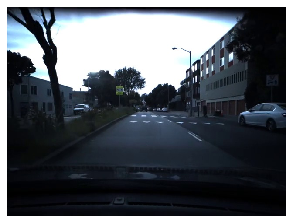

In [28]:
n = images[0]
nI = open_image(n)
nI.show(figsize=(5,5))

In [15]:
data = (SegmentationItemList.from_folder(path_vidFrames)
       .split_by_rand_pct()
       .label_from_folder(codes).split_none()
       .transform(get_transforms(), tfm_y=True, size=128)
       .databunch(bs=16, path=camvid)
       .normalize(imagenet_stats))

TypeError: 'numpy.ndarray' object is not callable